# Assignment Overview


## Background Story  

In the ever-evolving landscape of e-commerce, understanding customer behavior has become a cornerstone of strategic marketing. An emerging e-commerce giant, "FarTrend," has experienced rapid growth by offering a wide range of products from fashion to electronics, catering to over 3400 customers across diverse demographics. Despite their success, FarTrend faces challenges in personalizing marketing efforts and predicting future purchasing behavior, crucial for sustaining growth and enhancing customer satisfaction.

## The Challenge

FarTrend's extensive customer database reveals purchasing patterns over the past year but lacks actionable insights to anticipate the needs of new customers. Traditional marketing strategies have yielded moderate success; however, the leadership team believes that a more data-driven approach could unlock exponential growth.

You are working on the marketing intelligence team! Your goal is to develop a  machine learning model that segments FarTrend's customer base and predicts future purchases of new customers within their first year. This model aims to transform FarTrend approach to customer engagement by delivering personalized marketing campaigns and tailored product recommendations.

## Data Description

The IT extracted a dataframe with the main transaction performed by the customers. 

##### Variables
InvoiceNo: Invoice number. A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. A 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name.

Quantity: The quantities of each product (item) per transaction. 

InvoiceDate: The day and time when each transaction was generated.

UnitPrice: Product price per unit.

CustomerID: Unique customer number. 

Country: The name of the country where each customer resides.

## Question 1: Data Quality and Customer Understanding (30 points)

### Q1.1 Please perform the exploratory data analysis of the data. (20 points)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/Users/kuba/opt/anaconda3/envs/nova-3.11/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_excel('FarTrend_eRetail.xlsx')

---
#### Initial Data Exploration and basic cleaning
- displaying descriptive statistics of numeric columns
- checking datatypes
- dropping rows without customer ID (project is on the customer level, not product level)
- dropping duplicated rows
- exploration of number of unique values in non-numeric variables

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# check for missing vsariables
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

In [8]:
# investigate duplicates of rows
df[df.duplicated(keep=False, subset=["InvoiceNo", "StockCode", "Quantity", "InvoiceDate", "UnitPrice", "CustomerID", "Country"])]\
    .sort_values(by=["InvoiceNo", "StockCode", "Quantity", "InvoiceDate", "UnitPrice", "CustomerID", "Country"])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
440149,C574510,22360,GLASS JAR ENGLISH CONFECTIONERY,-1,2011-11-04 13:25:00,2.95,15110.0,United Kingdom
461407,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,2011-11-13 11:38:00,0.55,17838.0,United Kingdom
461408,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,2011-11-13 11:38:00,0.55,17838.0,United Kingdom
529980,C580764,22667,RECIPE BOX RETROSPOT,-12,2011-12-06 10:38:00,2.95,14562.0,United Kingdom


In [9]:
# drop duplicates
df = df.drop_duplicates(keep='first').reset_index(drop=True)

In [10]:
# descriptive statistics of numerical variables
df.drop('CustomerID', axis=1).describe()

,Quantity,InvoiceDate,UnitPrice
count,401604.000000,401604,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000
50%,5.000000,2011-07-29 15:40:00,1.950000
75%,12.000000,2011-10-20 11:58:30,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,250.283037,NaN,69.764035


Anomalies and Findings:

1: There are a lot of product sales without Customer ID, probably purchased by anonymous customers who did not set up an account. Unfortunately, for the purpose of this project (customer segmentation), we will need to drop these rows as they will not be compatible with further grouping by customer - to extract statistics (feature engineering) per individual cusgtomer.

Missing values in the description column are not a big concern, because:
- It might possible to partially infer them from other rows with the same StockCode
- Desriptions of products are not relevant to the objective of this project

2: anomalies detected:
- in Quantity column, the minimum values is equal to -80995 and maximum values to 80995, indicating significant outliers. What is more, the minimal values indicates that there might be different negative values of quanitity.
- in UnitPrice column, the maximum values is 38970 while mean is 3.46 and std 69.31 -- this indixates potential presence of outliers in the column

---
#### Dealing with anomalies in data
Before analysing distributions, temporal analsysis and statistics describing the dataset, it is crucial to insetigate possible anomalies and uncertainties related to datatypes and the variables. It's important to start EDA with relatively **clean data**, so that the noise does not influence understanding of the dataset. To investigate:
1. InvoiceNo column is of type "object", why not int or float?
2. StockCode column is of type "object", why not int or float?
3. Quantity column can have negative values
4. According to initial results of `df.describe()` the Quantity column has very low mean whil having extreme values of max and mean, indicating presence of outliers.
5. According to initial results of `df.describe()` the UnitPrice column has very low mean while having very high maximum value, indicating presence of outliers

**InvoiceNo Column**

In [11]:
# Unique number of InvoiceNo
df['InvoiceNo'].nunique()

22190

In [12]:
df_inv = df['InvoiceNo'].reset_index().copy()
df_inv['contains_str'] = df_inv.InvoiceNo.str.findall(r'[a-zA-Z]')

In [13]:
df_inv.contains_str.value_counts()

contains_str
[C]    8872
Name: count, dtype: int64

In [14]:
df[df_inv.contains_str.notna()].Quantity.max()

-1

In [15]:
# unique number of InvoiceNo with letters
df_inv[df_inv.contains_str.notna()].InvoiceNo.nunique()

3654

In [16]:
# most often appearing Description for InvoiceNo with letters
df[df_inv.contains_str.notna()].Description.value_counts().head(20)

Description
REGENCY CAKESTAND 3 TIER              180
Manual                                175
POSTAGE                                97
JAM MAKING SET WITH JARS               86
Discount                               77
SET OF 3 CAKE TINS PANTRY DESIGN       72
STRAWBERRY CERAMIC TRINKET BOX         54
ROSES REGENCY TEACUP AND SAUCER        53
RECIPE BOX PANTRY YELLOW DESIGN        47
JUMBO BAG RED RETROSPOT                44
WHITE HANGING HEART T-LIGHT HOLDER     42
LUNCH BAG RED RETROSPOT                42
GREEN REGENCY TEACUP AND SAUCER        42
WOOD 2 DRAWER CABINET WHITE FINISH     42
RED RETROSPOT CAKE STAND               41
SMALL GLASS HEART TRINKET POT          40
SET OF 3 REGENCY CAKE TINS             37
POPCORN HOLDER                         36
SILVER HANGING T-LIGHT HOLDER          35
PINK REGENCY TEACUP AND SAUCER         35
Name: count, dtype: int64

In [17]:
# does each invoice with C have corresponding invoice without C?
str_inv_ids = df_inv[df_inv.contains_str.notna()].InvoiceNo.str[1:].unique()

df.loc[df['InvoiceNo'].isin(str_inv_ids)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [18]:
items_with_string = df[df_inv.contains_str.notna()].Description.str.split().str.len() == 1

descriptions_to_drop = list(df[df_inv.contains_str.notna()][items_with_string].Description.unique())

In [19]:
descriptions_to_drop

['Discount', 'POSTAGE', 'Manual', 'CARRIAGE']

In [20]:
df[df.Description.isin(descriptions_to_drop)].shape[0]

1867

Result: all 8872 rows with a letter in the code, contain letter C in the invoice number AND the quantity is always negative for these rows. The phenomenon concern 3654 unique Invoice IDs. Also, the C is not just added to Invoice number in case of returns, but the whole number together with C is generated from scratch in case of negative values, even if negative values can be covered by previous purchases of the same ClientID and StockCode.

Conclusion: Invoices with negative values are marked with Letter C for. Supposedly, most of them concern returns or cancelled orders. However, most frequent values of "Description" in rows with C in invoice no contain keywords like: "Postage", "Discount" or "Manual" (277 unique invoices for these three keywords), indicating that negative values might be associated with other costs for the company.

**StockCode** Column

In [21]:
df.StockCode = df.StockCode.astype(str)

In [22]:
df.StockCode.nunique()

3684

In [23]:
df_stc = df['StockCode'].reset_index().copy()
df_stc['found_str'] = df_stc.StockCode.str.findall(r'[\D+]{2,}')
df_stc['contains_str'] = df_stc.StockCode.str.contains(r'[\D+]{2,}')

In [24]:
df_stc.found_str.value_counts()

found_str
[]                400064
[POST]              1196
[BL]                 296
[DOT]                 16
[CRUK]                16
[BANK CHARGES]        12
[PADS]                 4
Name: count, dtype: int64

In [25]:
df[df_stc.contains_str].Description.value_counts().head(10)

Description
POSTAGE                       1196
EDWARDIAN PARASOL BLACK        296
DOTCOM POSTAGE                  16
CRUK Commission                 16
Bank Charges                    12
PADS TO MATCH ALL CUSHIONS       4
Name: count, dtype: int64

In [26]:
# average value of Quantity and UnitPrice for each StockCode containing string
df[df_stc.contains_str].groupby('Description').agg({'Quantity': 'mean', 'UnitPrice': 'mean'}).sort_values(by='Quantity', ascending=False).head(10)

,Quantity,UnitPrice
Description,,
EDWARDIAN PARASOL BLACK,8.949324,5.887905
POSTAGE,2.510033,37.888528
Bank Charges,1.000000,13.750083
DOTCOM POSTAGE,1.000000,744.147500
PADS TO MATCH ALL CUSHIONS,1.000000,0.000750
CRUK Commission,-1.000000,495.839375


In [27]:
df[df_stc.contains_str].Description.value_counts().sum()

1540

In [28]:
# unique invoices with letters in StockCode
df[df_stc.contains_str].InvoiceNo.nunique()

1494

In [29]:
descriptions_to_drop += list(df[df_stc.contains_str].Description.unique())

In [30]:
descriptions_to_drop

['Discount',
 'POSTAGE',
 'Manual',
 'CARRIAGE',
 'POSTAGE',
 'EDWARDIAN PARASOL BLACK',
 'Bank Charges',
 'PADS TO MATCH ALL CUSHIONS',
 'DOTCOM POSTAGE',
 'CRUK Commission']

Result: There are 1540 rows (1494 unique invoices) with specific keywords present in the StockCode. Most of them corresponding to Postage.

Conclusion: After closer examination, we can conclude that sequences of letters in the StockCode indicate specific additional charge. However, due to the objective of the project (Customer-level clustering and product recommendation) it is recommended to drop these rows as they appear in relatively low number of unique Invoices.

**Quantity Column**

After examining the InvoiceNo and StockCode, it is possible to conclude that most of the negative values in Quantity column stand for returns or cancellations. Other keywords found in StockNo column helped in concluding that 1540 negative rows are connecetd to third-party charges.

Text(0.5, 1.0, 'Boxplot of Quantity (negative values only)')

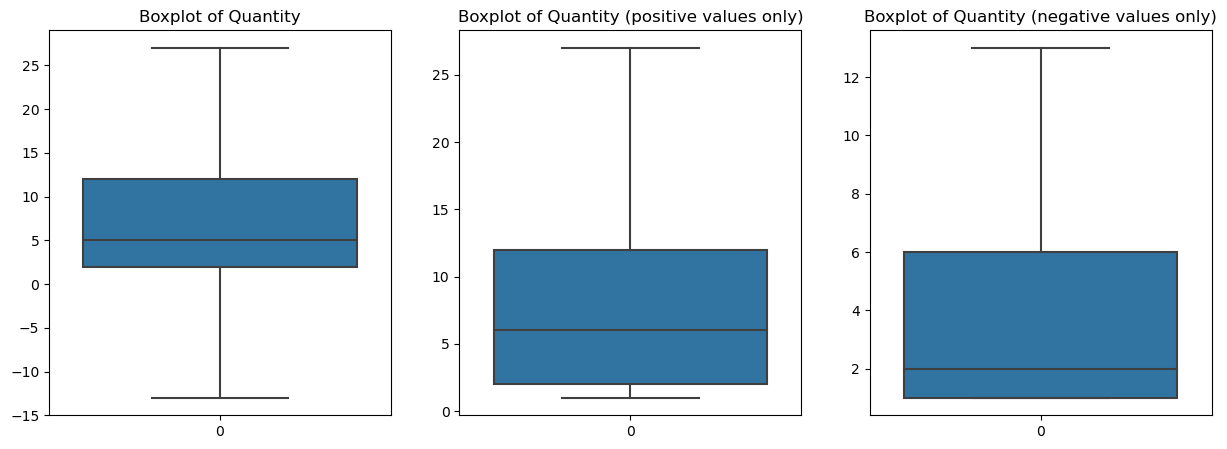

In [31]:
# what is the distribution of Quantity column?
# boxplot - no outliers
_, ax = plt.subplots(1, 3, figsize=(15, 5)) 

sns.boxplot(df.Quantity, ax=ax[0], showfliers=False)
ax[0].set_title('Boxplot of Quantity')

# only positive values - boxplot
sns.boxplot(df[df.Quantity > 0].Quantity, ax=ax[1], showfliers=False)
ax[1].set_title('Boxplot of Quantity (positive values only)')

# only negative values - boxplot
sns.boxplot(df[df.Quantity < 0].Quantity.abs().to_numpy(), ax=ax[2], showfliers=False)
ax[2].set_title('Boxplot of Quantity (negative values only)')


In [32]:
# outliers of Quantity -  3 x Z-score (scipy.stats libraru)
from scipy import stats

z = np.abs(stats.zscore(df.Quantity))
outliers_quantity = df.Quantity[(z > 3)]

# number of outliers
print('Number of outliers:', len(outliers_quantity))

# number of invoices with outliers
print('Number of Invoices with outliers:', df[df.Quantity.isin(outliers_quantity)].InvoiceNo.nunique())

# number of customers with outliers
print('Number of custoemrs with outliers:', df[df.Quantity.isin(outliers_quantity)].CustomerID.nunique())


Number of outliers: 185
Number of Invoices with outliers: 143
Number of custoemrs with outliers: 58


Results: The distribuion (without outliers) of Positive and Negative quantities differ, showing that people ordering, buy on average more pieces of the same item. The ourliers analysis resulted in 185 outliers (3x z-score). 

Conclusion: Due to the nature of the dataset: customer can at the same time purchase high quantities of very cheap products or low quantities of very expensive, it is advised to further explore outliers that for example purchase a lot of expensive products at once.

**UnitPrice** column 

Text(0.5, 1.0, 'Boxplot of UnitPrice')

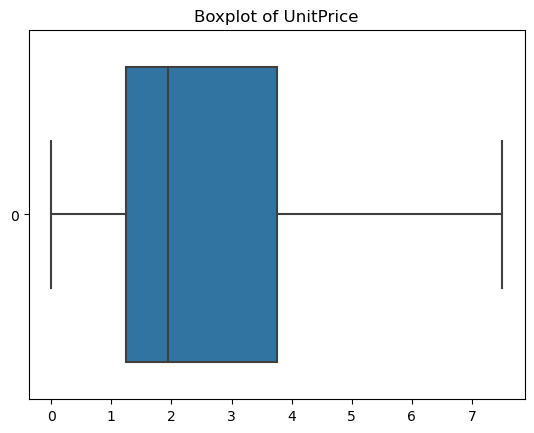

In [33]:
# What is the distribution of UnitPrice column?
# boxplot - np outliers
sns.boxplot(df.UnitPrice, orient='h', showfliers=False)
plt.title('Boxplot of UnitPrice')


In [34]:
# outliers
z = np.abs(stats.zscore(df.UnitPrice))
outliers_unitprice = df.UnitPrice[(z > 3)]

# number of outliers
print('Number of outliers:', len(outliers_unitprice))

# number of invoices with outliers
print('Number of Invoices with outliers:', df[df.UnitPrice.isin(outliers_unitprice)].InvoiceNo.nunique())

# number of customers with outliers
print('Number of custoemrs with outliers:', df[df.UnitPrice.isin(outliers_unitprice)].CustomerID.nunique())

Number of outliers: 149
Number of Invoices with outliers: 140
Number of custoemrs with outliers: 60


**Outliers of TotalValue (Quantity x UnitPrice) and Invoice Value**

In [35]:
# TotalValue (Quantity * UnitPrice)
df['TotalValue'] = df.Quantity * df.UnitPrice

In [36]:
# outliers of TotalValue
z = np.abs(stats.zscore(df.TotalValue))

outliers_total_value = df.TotalValue[(z > 3)]

# number of outliers
print('Number of outliers:', len(outliers_total_value))

# number of invoices with outliers
print('Number of Invoices with outliers:', df[df.TotalValue.isin(outliers_total_value)].InvoiceNo.nunique())

# number of customers with outliers
print('Number of customers with outliers:', df[df.TotalValue.isin(outliers_total_value)].CustomerID.nunique())

Number of outliers: 252
Number of Invoices with outliers: 156
Number of customers with outliers: 50


In [37]:
# Dataset of invoices and invoice value
df_inv_outliers = df.groupby(['InvoiceNo', 'CustomerID']).agg({'TotalValue': 'sum'}).reset_index()

In [38]:
# outliers of invoice value
z = np.abs(stats.zscore(df_inv_outliers.TotalValue))

outliers = df_inv_outliers.TotalValue[(z > 3)]

# number of outliers
print('Number of outliers:', len(outliers))

# number of customers with outliers
print('Number of custoemrs with outliers:', df_inv_outliers[df_inv_outliers.TotalValue.isin(outliers)].CustomerID.nunique())


Number of outliers: 92
Number of custoemrs with outliers: 25


#### Cleaning the data I

Due to the discovery of returns / cancellations, it is highly probable that a number of negative values in Quantity column, correspond to some records also included with a positive value. This can be further concluded, as `df.describe()` has shown that the Maximum and Minimum values of Quantity column are: 80995 and -80995. 

**dropping outliers**: in reality it is possible for businesses to sell very cheap things in very high quantites or very expensive items in very low quantities. Also, taing into the consideration the fact that some positive values of quantity are zeroed with their negative equivalents, I want to make sure that in all of such cases, when the negative equivalend exists, it is also dropped. To do that, the outliers will be removed already from the database containing customer-level data, as it is more relvant to both clustering and recommendations.

In [39]:
#outlier_invoices = df[df.Quantity.isin(outliers_quantity) | df.UnitPrice.isin(outliers_unitprice) | df.TotalValue.isin(outliers_total_value)].InvoiceNo.unique()

#print(f"removing {len(outlier_invoices)} invoices of {df[df.InvoiceNo.isin(outlier_invoices)].CustomerID.nunique()} customers")

#df = df[~df.InvoiceNo.isin(outlier_invoices)]

In [40]:
#df.drop(['InvoiceDate', 'CustomerID'], axis=1).describe()

**Dropping negative values that are not returns or cancelations**

In [41]:
df = df[~df.Description.isin(descriptions_to_drop)]

**Annotating the Returns**

In [42]:
df['IsReturn'] = df.Quantity < 0

In [43]:
df['IsReturn'].value_counts()

IsReturn
False    390892
True       8501
Name: count, dtype: int64

In [44]:
print(f'Dropping {df[df.UnitPrice == 0].shape[0]} rows with values 0 in Quantity')
df = df[df.UnitPrice !=0]

Dropping 33 rows with values 0 in Quantity


In [45]:
# dropping rows with unit price == 0
df = df[df.UnitPrice != 0]

print(f'Dropping {df[df.Quantity == 0].shape[0]} rows with values 0 in Quantity')


Dropping 0 rows with values 0 in Quantity


---
#### Distributions: Quantitative Variables

Text(0.5, 1.0, 'UnitPrice')

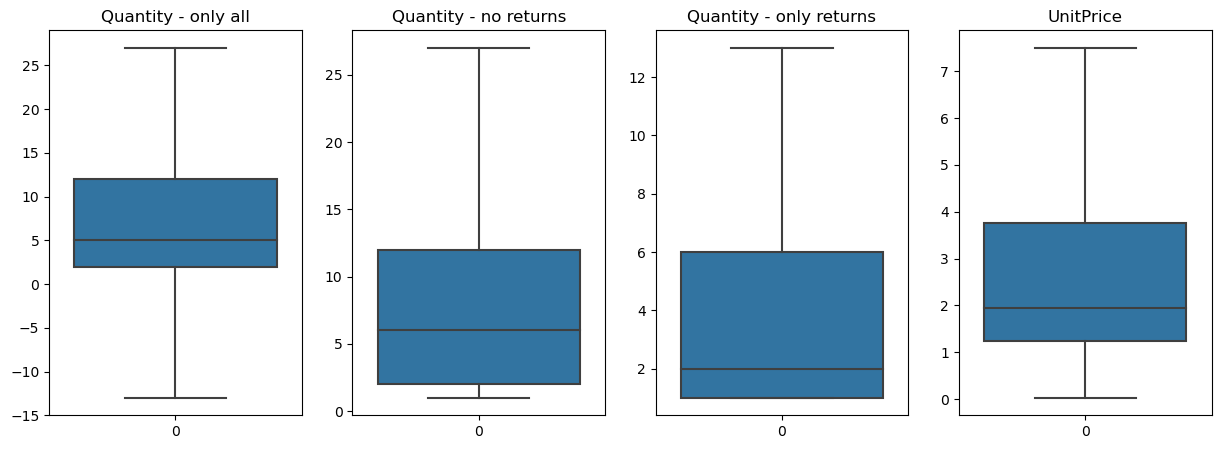

In [46]:
# display box plots without outliers

fig, ax = plt.subplots(1,4, figsize=(15, 5))

sns.boxplot(df['Quantity'], ax=ax[0], showfliers=False)
ax[0].set_title('Quantity - only all')

sns.boxplot(df[df.IsReturn == False]['Quantity'], ax=ax[1], showfliers=False)
ax[1].set_title('Quantity - no returns')

sns.boxplot(df[df.IsReturn == True]['Quantity'].abs().to_numpy(), ax=ax[2], showfliers=False)
ax[2].set_title('Quantity - only returns')

sns.boxplot(df['UnitPrice'], ax=ax[3], showfliers=False)
ax[3].set_title('UnitPrice')

In [47]:
# KS test of normality for Quantity and UnitPrice columns

from scipy.stats import kstest

print(kstest(df['Quantity'], 'norm'))

print(kstest(df['UnitPrice'], 'norm'))

# no normal distribution in both columns

KstestResult(statistic=0.8200581875749532, pvalue=0.0, statistic_location=1, statistic_sign=-1)
KstestResult(statistic=0.657068074890837, pvalue=0.0, statistic_location=1.25, statistic_sign=-1)


**Total Value**

Text(0.5, 1.0, 'TotalValue - only returns')

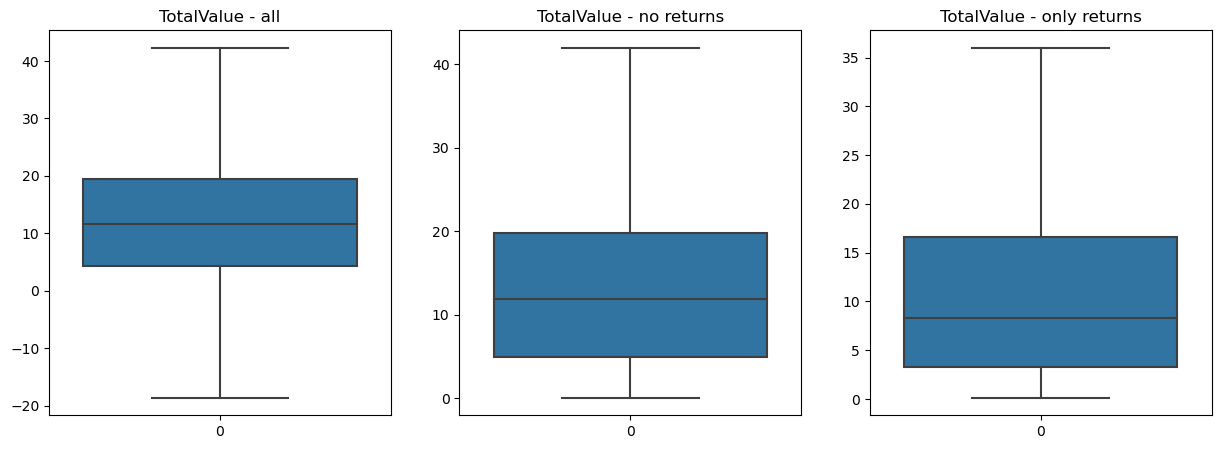

In [48]:

fig, ax = plt.subplots(1,3, figsize=(15, 5))

sns.boxplot(df['TotalValue'], ax=ax[0], showfliers=False)
ax[0].set_title('TotalValue - all')

sns.boxplot(df[df.IsReturn == False]['TotalValue'], ax=ax[1], showfliers=False)
ax[1].set_title('TotalValue - no returns')

sns.boxplot(df[df.IsReturn == True]['TotalValue'].abs().to_numpy(), ax=ax[2], showfliers=False)
ax[2].set_title('TotalValue - only returns')



---
#### Distributions: Qualitative Variables

Products (Descriptions)

In [49]:
# number of unique products
df.Description.nunique()

3887

In [50]:
df_products = df.Description.value_counts().reset_index()
df_products.columns = ['Product', 'Count']
df_products['rate'] = df_products['Count'] / df.InvoiceNo.nunique()


In [51]:
df_products.head(10)

,Product,Count,rate
0,WHITE HANGING HEART T-LIGHT HOLDER,2058,0.094482
1,REGENCY CAKESTAND 3 TIER,1893,0.086907
2,JUMBO BAG RED RETROSPOT,1659,0.076164
3,PARTY BUNTING,1408,0.064641
4,ASSORTED COLOUR BIRD ORNAMENT,1405,0.064503
5,LUNCH BAG RED RETROSPOT,1345,0.061748
6,SET OF 3 CAKE TINS PANTRY DESIGN,1224,0.056193
7,LUNCH BAG BLACK SKULL.,1099,0.050455
8,PACK OF 72 RETROSPOT CAKE CASES,1062,0.048756
9,SPOTTY BUNTING,1026,0.047103


**Country**

In [52]:
df['IsUK'] = df.Country == 'United Kingdom'

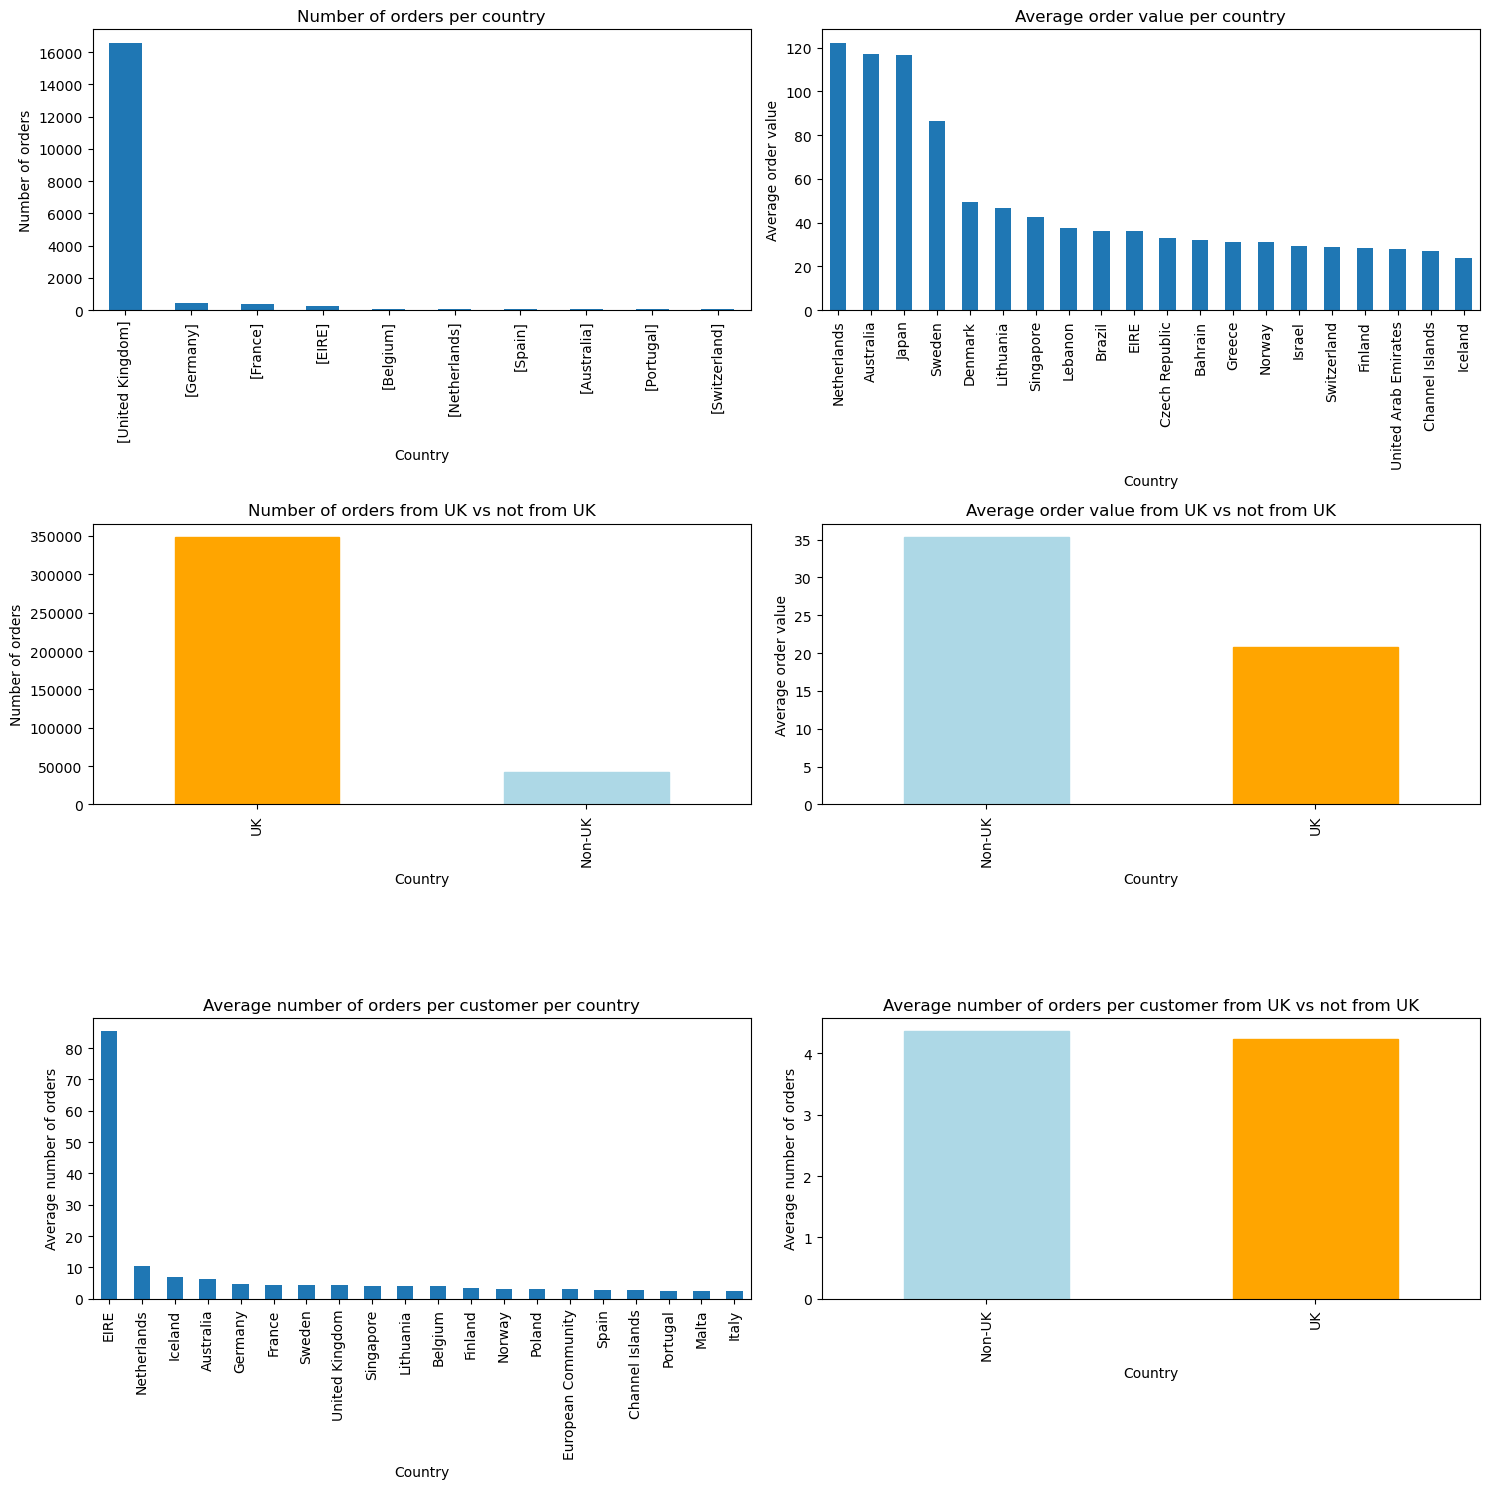

In [53]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

df[df.IsReturn == False].groupby('InvoiceNo').Country.unique().value_counts().sort_values(ascending=False).head(10).plot(kind='bar', ax=ax[0, 0])
ax[0, 0].set_title('Number of orders per country')
ax[0, 0].set_xlabel('Country')
ax[0, 0].set_ylabel('Number of orders')

df[df.IsReturn == False].groupby(['Country']).TotalValue.mean().sort_values(ascending=False).head(20).plot(kind='bar', ax=ax[0, 1])
ax[0, 1].set_title('Average order value per country')
ax[0, 1].set_xlabel('Country')
ax[0, 1].set_ylabel('Average order value')

df[df.IsReturn == False]['IsUK'].value_counts().plot(kind='bar', ax=ax[1, 0], color=['red', 'blue'])
ax[1, 0].set_title('Number of orders from UK vs not from UK')
ax[1, 0].set_xlabel('Country')
ax[1, 0].set_ylabel('Number of orders')
ax[1, 0].set_xticks([1, 0])
ax[1, 0].set_xticklabels(['Non-UK', 'UK'])
ax[1, 0].get_children()[0].set_color('orange')
ax[1, 0].get_children()[1].set_color('lightblue')

df[df.IsReturn == False].groupby('IsUK').TotalValue.mean().plot(kind='bar', ax=ax[1, 1])
ax[1, 1].set_title('Average order value from UK vs not from UK')   
ax[1, 1].set_xlabel('Country')
ax[1, 1].set_ylabel('Average order value')
ax[1, 1].set_xticks([0, 1])
ax[1, 1].set_xticklabels(['Non-UK', 'UK'])
ax[1, 1].get_children()[1].set_color('orange')
ax[1, 1].get_children()[0].set_color('lightblue')

df[df.IsReturn == False].groupby(['CustomerID', 'Country']).InvoiceNo.nunique().reset_index().groupby('Country').InvoiceNo.mean().sort_values(ascending=False).head(20).plot(kind='bar', ax=ax[2, 0])
ax[2, 0].set_title('Average number of orders per customer per country')
ax[2, 0].set_xlabel('Country')
ax[2, 0].set_ylabel('Average number of orders')


df[df.IsReturn == False].groupby(['CustomerID', 'IsUK']).InvoiceNo.nunique().reset_index().groupby('IsUK').InvoiceNo.mean().sort_values(ascending=False).plot(kind='bar', ax=ax[2, 1])
ax[2, 1].set_title('Average number of orders per customer from UK vs not from UK')
ax[2, 1].set_xlabel('Country')
ax[2, 1].set_ylabel('Average number of orders')
ax[2, 1].set_xticks([0, 1])
ax[2, 1].set_xticklabels(['Non-UK', 'UK'])
ax[2, 1].get_children()[1].set_color('orange')
ax[2, 1].get_children()[0].set_color('lightblue')

plt.tight_layout()


---
#### Temporal Analysis

**Days of the Week**

In [54]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

df['InvoiceWeek'] = df['InvoiceDate'].dt.to_period('W')

df['InvoiceDay'] = df['InvoiceDate'].dt.to_period('D')

df['InvoiceDayOfWeek'] = df['InvoiceDate'].dt.dayofweek

df['InvoiceHour']= df['InvoiceDate'].dt.hour

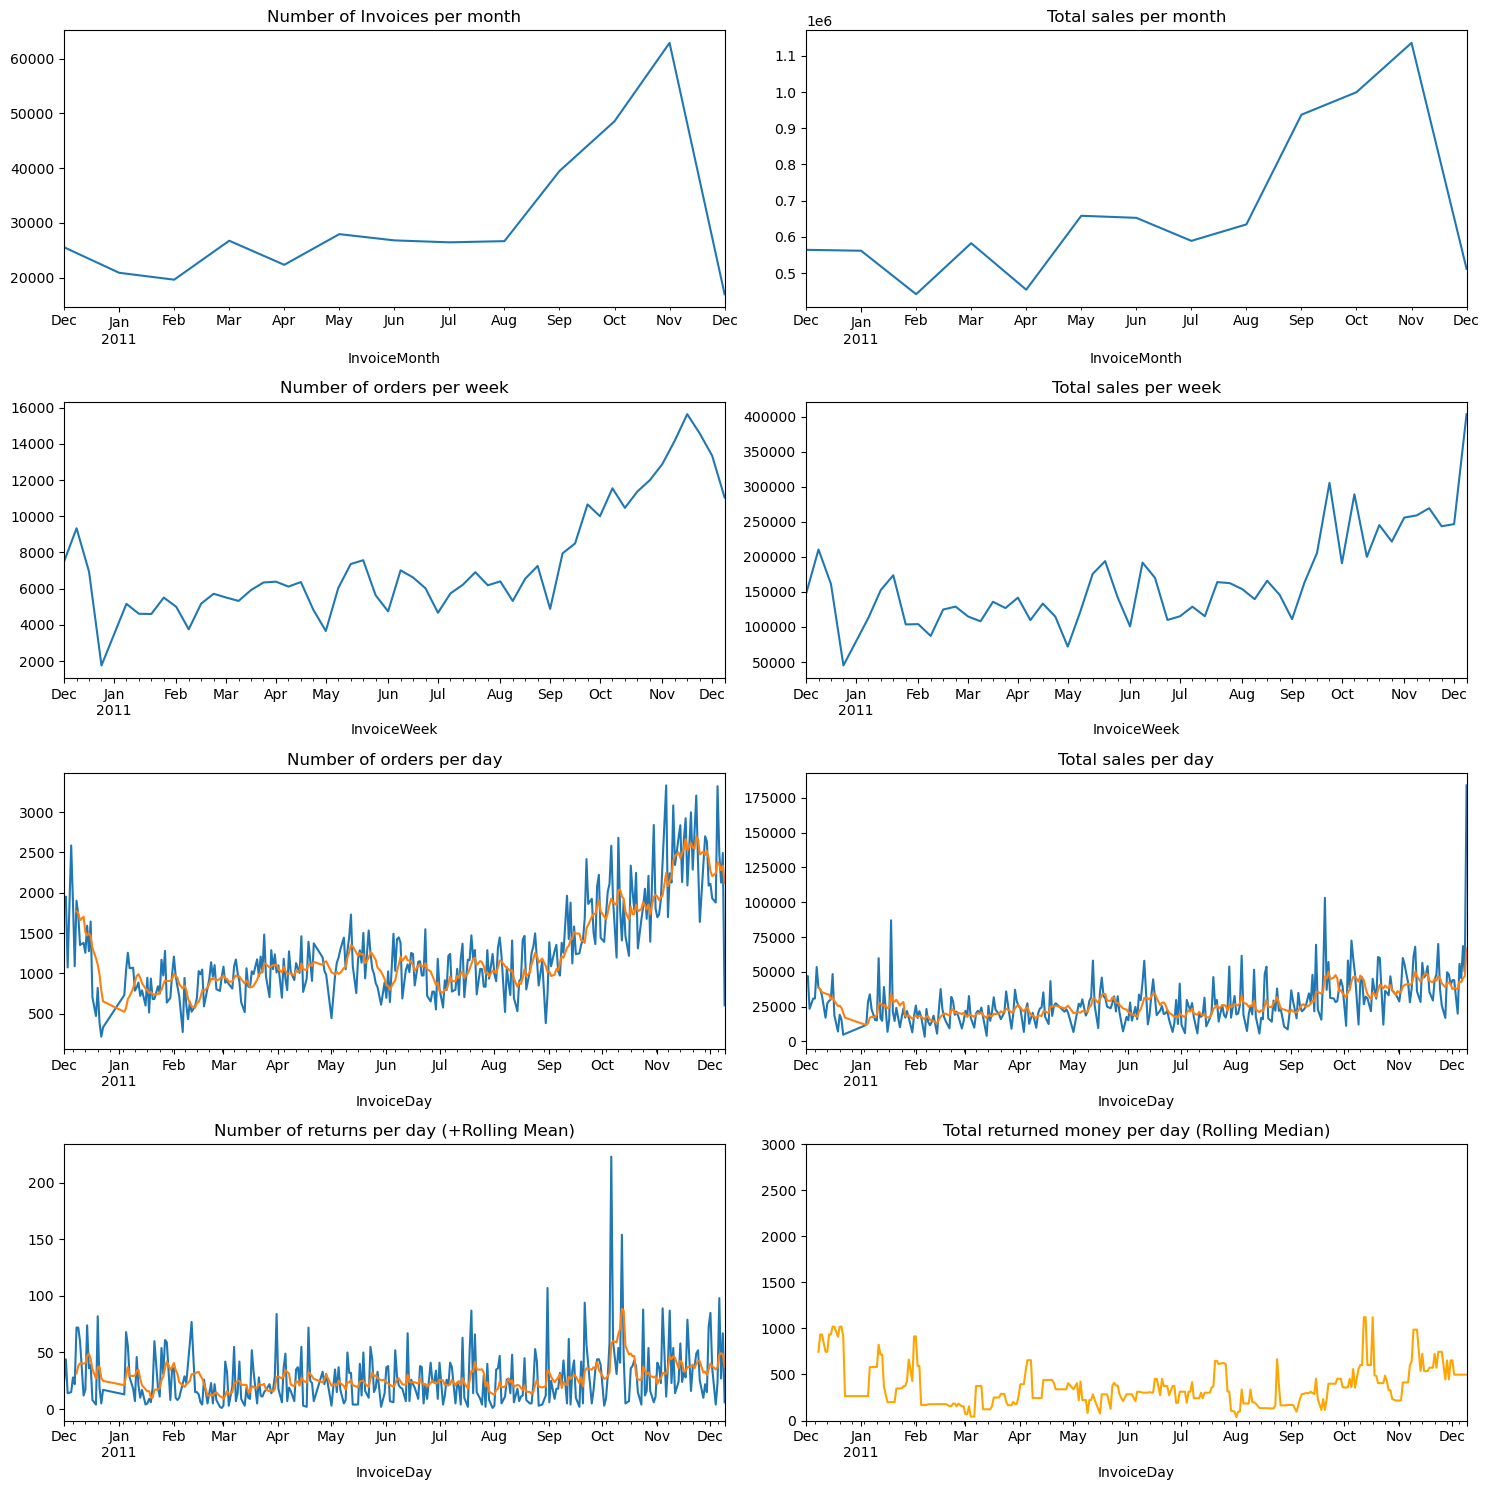

In [55]:
# Order Number and Total Sales per month, week and day

fig, ax = plt.subplots(4, 2, figsize=(15, 15))

df[df.IsReturn==False]['InvoiceMonth'].value_counts().sort_index().plot(kind='line', ax=ax[0, 0])
ax[0, 0].set_title('Number of Invoices per month')

df[df.IsReturn==False].groupby('InvoiceMonth').TotalValue.sum().sort_index().plot(kind='line', ax=ax[0, 1])
ax[0, 1].set_title('Total sales per month')

df[df.IsReturn==False]['InvoiceWeek'].value_counts().sort_index().plot(kind='line', ax=ax[1, 0])
ax[1, 0].set_title('Number of orders per week')

df[df.IsReturn==False].groupby('InvoiceWeek').TotalValue.sum().sort_index().plot(kind='line', ax=ax[1, 1])
ax[1, 1].set_title('Total sales per week')

df[df.IsReturn==False]['InvoiceDay'].value_counts().sort_index().plot(kind='line', ax=ax[2, 0])
ax[2, 0].set_title('Number of orders per day')

df[df.IsReturn==False]['InvoiceDay'].value_counts().sort_index().rolling(window=7).mean().plot(kind='line', ax=ax[2, 0])
df[df.IsReturn==False].groupby('InvoiceDay').TotalValue.sum().sort_index().plot(kind='line', ax=ax[2, 1])

ax[2, 1].set_title('Total sales per day')
df[df.IsReturn==False].groupby('InvoiceDay').TotalValue.sum().sort_index().rolling(window=7).mean().plot(kind='line', ax=ax[2, 1])

df[df.IsReturn==True]['InvoiceDay'].value_counts().sort_index().plot(kind='line', ax=ax[3,0])
ax[3,0].set_title('Number of returns per day (+Rolling Mean)')
df[df.IsReturn==True]['InvoiceDay'].value_counts().sort_index().rolling(window=7).mean().plot(kind='line', ax=ax[3,0])

ax[3,1].set_title('Total returned money per day (Rolling Median)')
df[df.IsReturn==True].groupby('InvoiceDay').TotalValue.sum().abs().sort_index().rolling(window=7).median().plot(kind='line', ax=ax[3,1], color='orange')
# y axis limit
ax[3,1].set_ylim(0, 3000)


plt.tight_layout()

Text(0, 0.5, 'Average order value')

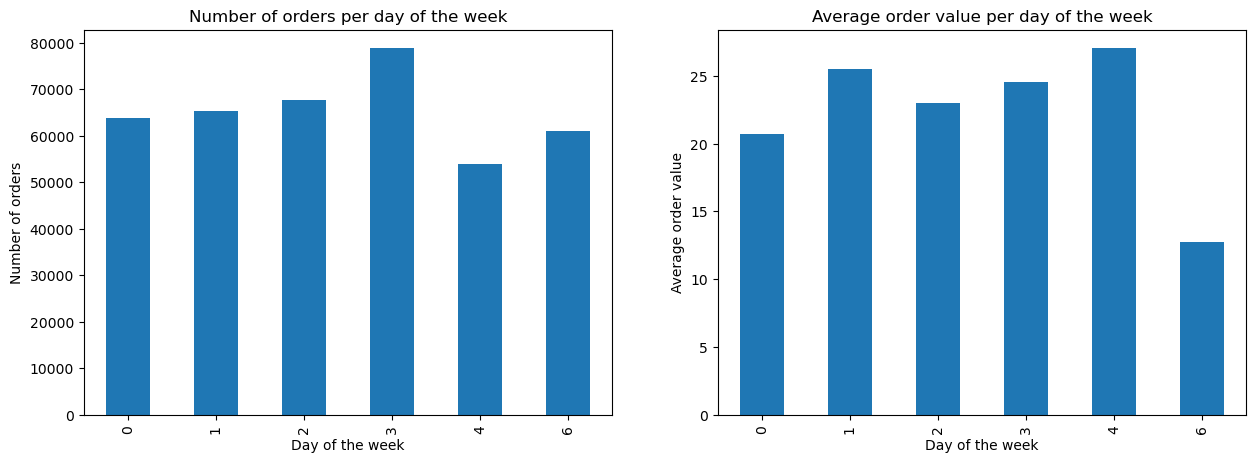

In [56]:
# the average number of orders and average sales per day of the week 

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df[df.IsReturn == False]['InvoiceDayOfWeek'].value_counts().sort_index().plot(kind='bar', ax=ax[0])
ax[0].set_title('Number of orders per day of the week')
ax[0].set_xlabel('Day of the week')
ax[0].set_ylabel('Number of orders')

df[df.IsReturn == False].groupby('InvoiceDayOfWeek').TotalValue.mean().sort_index().plot(kind='bar', ax=ax[1])
ax[1].set_title('Average order value per day of the week')
ax[1].set_xlabel('Day of the week')
ax[1].set_ylabel('Average order value')

**Time of the day**

Text(0, 0.5, 'Average order value')

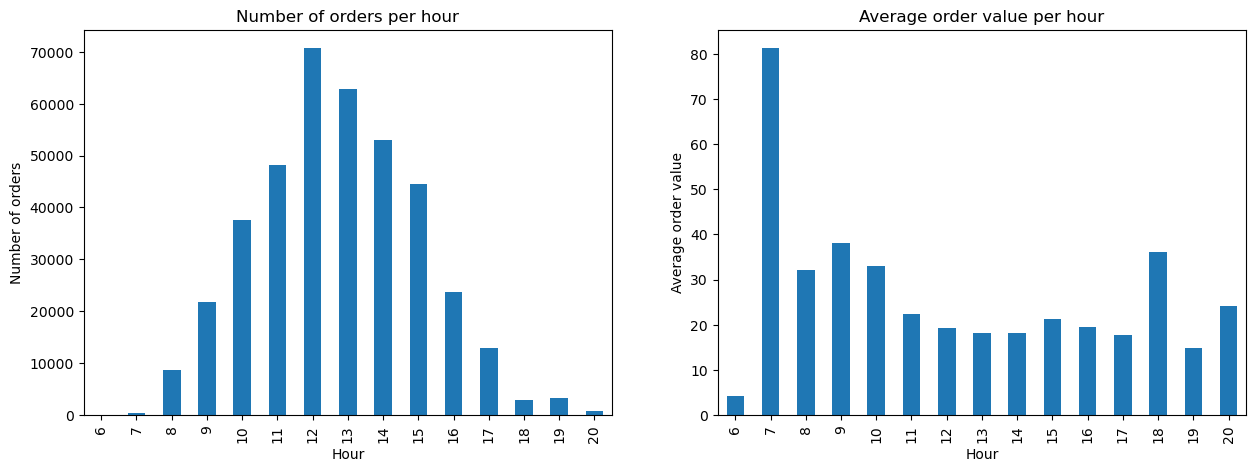

In [57]:
# AVG Number of orders and value of orders per hour of the day

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df[df.IsReturn == False]['InvoiceHour'].value_counts().sort_index().plot(kind='bar', ax=ax[0])
ax[0].set_title('Number of orders per hour')
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Number of orders')

df[df.IsReturn == False].groupby('InvoiceHour').TotalValue.mean().sort_index().plot(kind='bar', ax=ax[1])
ax[1].set_title('Average order value per hour')
ax[1].set_xlabel('Hour')
ax[1].set_ylabel('Average order value')

#### Q1.2 Please describe in two paragraphs the main data insights. Connect the insight with the business  (10 points)


#### 1: Purchases and Returns in Time
According to the temporal analysis of the timeframe (one year), we cannot strictly say that the company has experience significant grow in orders during this year of operating. The reason for such conclusion is because number of orders grew only in the last quarter of the year, which is typical for ecommerce due to the holiday season - this did not significantly influence sales, which remain steady / slightly growing along the year. Interestingly, the number of returns does not seem to follow the same pattern as the number of orders -- number of returns does not significantly grow in the end of the year, meaning that less people return their orders, however, when looking at returns values along the year, they seem to be higher in Q4, probably also because of increased average order value during that time.

#### 2: Customer Value and Countries
Most CustomerID correspond to customers from United Kingdom, which might lead to the conclusion to drop all other customers from the database. However, after closer examination, we can observe, that actually, customers from outside of the UK, order more on average (per customer) in terms of volume (number of orders) and value. It means, that the fact that customer is from outside of the UK is might be a significant differentiator, very useful for further segmentation.  

## Question 2: Segment the clients based on their purchase profile (35 points)

---
#### Feature Engineering

In [58]:
# create customerDF with columns: CustomerID, Country, IsUK, Number of orders, Total sales, Average order value, Number of returns, Total returned money, Average returned money

customerDF = df.groupby('CustomerID').agg({'Country': 'first', 'IsUK': 'first', 'InvoiceNo': 'nunique'}).reset_index()

# total number of returns for each customer - number of unique invoices with at least one True in the IsReturn column
customerDF = customerDF.merge(df.loc[df.IsReturn == True].groupby('CustomerID').InvoiceNo.nunique().reset_index().rename(columns={"InvoiceNo":"NumberOfReturns"}), on='CustomerID', how='left')

# sum of OrderProductValue for each customer only for orders (not returns)
customerDF = customerDF.merge(df.loc[df.IsReturn == False].groupby('CustomerID').TotalValue.sum().reset_index(), on='CustomerID', how='left')
customerDF['AverageOrderValue'] = customerDF['TotalValue'] / customerDF['InvoiceNo']

# total returned money - only for customers who have ever returned anything
customerDF = customerDF.merge(df.loc[df.IsReturn == True].groupby('CustomerID').TotalValue.sum().abs().reset_index().rename(columns={"TotalValue":"TotalReturnedValue"}),
                              on='CustomerID',
                              how='left'
                              )

customerDF['AverageReturnedValue'] = customerDF['TotalReturnedValue'] / customerDF['NumberOfReturns']

# rename columns to more accurate names
customerDF.rename(columns={'InvoiceNo': 'NumberOfOrders', 'TotalValue': 'TotalSales'}, inplace=True)

In [59]:
# number of unique items purchased
uniqueItemsDF = df.loc[df.IsReturn == False]. \
    groupby(['CustomerID', 'InvoiceNo']).Description.nunique().reset_index(). \
        groupby('CustomerID').Description.mean().reset_index(). \
            rename(columns={'Description':'UniqueItemsPerOrder'})

customerDF = customerDF.merge(uniqueItemsDF, on='CustomerID', how='left')
                 

In [60]:
# avg product quantity
productQuantitiesDF = df.loc[df.IsReturn == False]. \
    groupby(['CustomerID']).Quantity.mean().reset_index(). \
        rename(columns={'Quantity':'AverageProductQuantity'})

customerDF = customerDF.merge(productQuantitiesDF, on='CustomerID', how='left')

In [61]:
# avg item value
itemPriceDF = df.loc[df.IsReturn == False]. \
    groupby('CustomerID').UnitPrice.mean().reset_index(). \
        rename(columns={'UnitPrice':'AvgItemPrice'})

customerDF = customerDF.merge(itemPriceDF, on='CustomerID', how='left')

In [62]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalValue', 'IsReturn', 'IsUK',
       'InvoiceMonth', 'InvoiceWeek', 'InvoiceDay', 'InvoiceDayOfWeek',
       'InvoiceHour'],
      dtype='object')

In [63]:
# favourite day of the week

favoriteShoppingDayDF = df.groupby(['CustomerID', 'InvoiceDayOfWeek']).size().reset_index(name='Count')
favoriteShoppingDayDF = favoriteShoppingDayDF.loc[favoriteShoppingDayDF.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'InvoiceDayOfWeek']]

customerDF = customerDF.merge(favoriteShoppingDayDF, on='CustomerID', how='left')

In [64]:
# favorite shopping time of the day

favoriteHourDF = df.groupby(['CustomerID', 'InvoiceHour']).size().reset_index(name='Count')
favoriteHourDF = favoriteHourDF.loc[favoriteHourDF.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'InvoiceHour']]

customerDF = customerDF.merge(favoriteHourDF, on='CustomerID', how='left')

In [65]:
customerDF.isna().sum()

CustomerID                   0
Country                      0
IsUK                         0
NumberOfOrders               0
NumberOfReturns           2829
TotalSales                  28
AverageOrderValue           28
TotalReturnedValue        2829
AverageReturnedValue      2829
UniqueItemsPerOrder         28
AverageProductQuantity      28
AvgItemPrice                28
InvoiceDayOfWeek             0
InvoiceHour                  0
dtype: int64

In [66]:
# drop customers that only have returns
customerDF = customerDF[~customerDF.TotalSales.isna()]

In [67]:
customerDF.isna().sum()

CustomerID                   0
Country                      0
IsUK                         0
NumberOfOrders               0
NumberOfReturns           2829
TotalSales                   0
AverageOrderValue            0
TotalReturnedValue        2829
AverageReturnedValue      2829
UniqueItemsPerOrder          0
AverageProductQuantity       0
AvgItemPrice                 0
InvoiceDayOfWeek             0
InvoiceHour                  0
dtype: int64

In [68]:

# fill nans in columns related to returns with 0
customerDF.fillna(0, inplace=True)

In [69]:
from datetime import datetime as dt
df.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [70]:
today = dt(2011, 12, 10)

In [71]:
# days since firtst invoice
customerDF = customerDF.merge(
    df.groupby('CustomerID').InvoiceDate.min().reset_index().rename(columns={'InvoiceDate': 'FirstInvoiceDate'}),
      on='CustomerID', how='left')

# convert to days since first invoice
customerDF['DaysSinceFirstInvoice'] = (today - customerDF['FirstInvoiceDate']).dt.days

# days since last invoice
customerDF = customerDF.merge(
    df.groupby('CustomerID').InvoiceDate.max().reset_index().rename(columns={'InvoiceDate': 'LastInvoiceDate'}),
      on='CustomerID', how='left')

# convert to days since last invoice
customerDF['DaysSinceLastInvoice'] = (today - customerDF['LastInvoiceDate']).dt.days

# drop the columns with dates
customerDF.drop(['FirstInvoiceDate', 'LastInvoiceDate'], axis=1, inplace=True)

In [72]:
customerDF.sample(10)

,CustomerID,Country,IsUK,NumberOfOrders,NumberOfReturns,TotalSales,AverageOrderValue,TotalReturnedValue,AverageReturnedValue,UniqueItemsPerOrder,AverageProductQuantity,AvgItemPrice,InvoiceDayOfWeek,InvoiceHour,DaysSinceFirstInvoice,DaysSinceLastInvoice
3851,17624.0,United Kingdom,True,2,0.0,843.48,421.740000,0.00,0.00,25.000000,11.080000,2.958000,3,10,218,14
945,13617.0,United Kingdom,True,3,0.0,544.18,181.393333,0.00,0.00,14.666667,6.818182,2.789773,6,13,180,40
3797,17550.0,United Kingdom,True,3,0.0,267.16,89.053333,0.00,0.00,14.000000,2.047619,2.978095,6,15,243,197
1544,14452.0,United Kingdom,True,2,0.0,259.05,129.525000,0.00,0.00,29.000000,1.933333,3.163000,1,11,93,10
2021,15109.0,United Kingdom,True,2,1.0,484.95,242.475000,21.20,21.20,28.000000,4.678571,5.880357,4,9,245,240
4202,18109.0,United Kingdom,True,31,5.0,8004.92,258.223226,127.65,25.53,16.730769,9.591837,4.908345,6,12,369,1
3857,17633.0,United Kingdom,True,6,2.0,1324.84,220.806667,82.50,41.25,17.500000,9.200000,2.797429,3,15,359,31
1737,14711.0,United Kingdom,True,12,1.0,2839.62,236.635000,30.60,30.60,30.818182,2.800000,4.836928,1,13,262,10
3132,16624.0,United Kingdom,True,2,0.0,810.57,405.285000,0.00,0.00,23.500000,10.166667,3.073750,1,12,197,80
836,13470.0,United Kingdom,True,2,0.0,165.00,82.500000,0.00,0.00,5.000000,10.000000,1.650000,1,17,115,99


In [73]:
customerDF.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4334.0,15299.251731,1721.994109,12346.0000,13812.250000,15297.500000,16778.750000,18287.000000
NumberOfOrders,4334.0,5.018689,9.106791,1.0000,1.000000,3.000000,5.000000,242.000000
NumberOfReturns,4334.0,0.772958,1.970390,0.0000,0.000000,0.000000,1.000000,45.000000
TotalSales,4334.0,2012.461691,8897.155977,3.7500,303.510000,662.565000,1627.912500,279138.020000
AverageOrderValue,4334.0,351.540588,1109.623769,3.1000,156.622500,241.813333,372.032500,56157.500000
TotalReturnedValue,4334.0,107.793085,2855.356684,0.0000,0.000000,0.000000,14.750000,168469.600000
AverageReturnedValue,4334.0,81.429559,2837.981581,0.0000,0.000000,0.000000,10.500000,168469.600000
UniqueItemsPerOrder,4334.0,21.602540,19.450922,1.0000,9.340909,16.816667,27.702381,297.764706
AverageProductQuantity,4334.0,45.693471,1205.077367,1.0000,6.046894,10.000000,14.743534,74215.000000
AvgItemPrice,4334.0,3.450614,8.861106,0.1225,2.149319,2.826345,3.688056,434.650000


In [74]:
# delete outliers from customerDF

z = np.abs(stats.zscore(customerDF[['NumberOfOrders',	'NumberOfReturns',	'TotalSales',	'AverageOrderValue',	'TotalReturnedValue',	'AverageReturnedValue',	'UniqueItemsPerOrder',	'AverageProductQuantity',	'AvgItemPrice',	'InvoiceDayOfWeek',	'InvoiceHour',	'DaysSinceFirstInvoice', 'DaysSinceLastInvoice']]))

outliers = customerDF[(z > 2.5).any(axis=1)]

print(f'dropping {len(outliers)} outliers')

customerDF = customerDF[~customerDF.CustomerID.isin(outliers.CustomerID)]

dropping 409 outliers


In [75]:
customerDF.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,3925.0,15303.409682,1717.837974,12347.0000,13822.000000,15303.000000,16780.000000,18287.00
NumberOfOrders,3925.0,4.047643,4.006878,1.0000,1.000000,3.000000,5.000000,27.00
NumberOfReturns,3925.0,0.555159,0.984501,0.0000,0.000000,0.000000,1.000000,5.00
TotalSales,3925.0,1242.234790,1765.161037,3.7500,302.700000,644.300000,1476.090000,21429.39
AverageOrderValue,3925.0,301.160770,245.505428,3.1000,155.130000,237.263333,361.960000,2661.24
TotalReturnedValue,3925.0,25.093587,151.953354,0.0000,0.000000,0.000000,12.200000,5228.40
AverageReturnedValue,3925.0,15.678115,91.770869,0.0000,0.000000,0.000000,9.300000,3528.34
UniqueItemsPerOrder,3925.0,19.859115,14.208888,1.0000,9.450000,16.600000,26.923077,70.00
AverageProductQuantity,3925.0,18.662042,67.145383,1.0000,6.333333,10.134021,14.666667,2000.00
AvgItemPrice,3925.0,3.131460,1.684132,0.1225,2.142000,2.830741,3.701250,21.95


Text(0.5, 1.0, 'Correlation between variables')

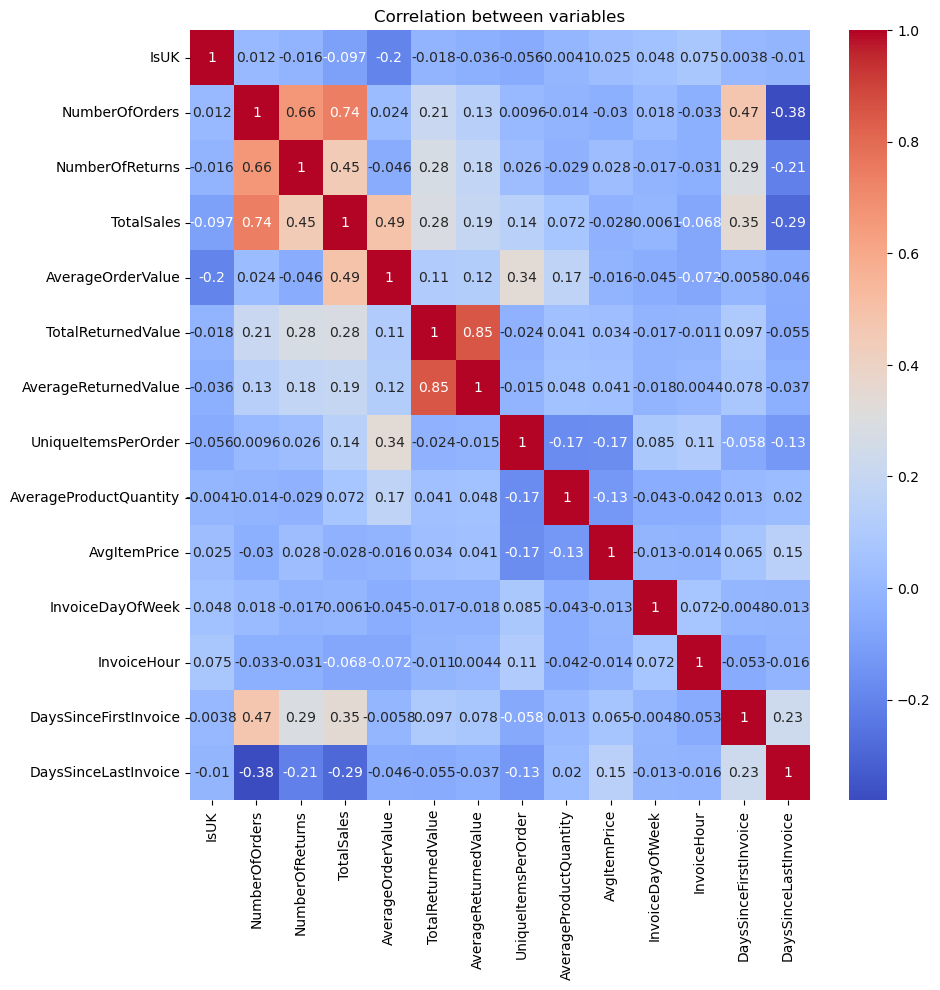

In [76]:
# visualise correlation between variables
plt.figure(figsize=(10, 10))
sns.heatmap(customerDF.drop(['CustomerID', 'Country'], axis=1).corr(), annot=True, cmap='coolwarm')
# title
plt.title('Correlation between variables')

**Concluaion**: From the graph, we can see varaince explained cumualitvely and individually by each component. It seems, that most reasonable choise is 7 components as they explain more than 75% of variance, which can be a reasonable arbitrary threshold.

#### Q2.1 Build a baseline model to segment the costumers. (15 points)

The first model will rely on three features only, for the ease of interpration of the results.
- Total Sales (customer value)
- Number of Orders (frequency)
- Days of last order (recency)

array([[<Axes: title={'center': 'TotalSales'}>,
        <Axes: title={'center': 'NumberOfOrders'}>],
       [<Axes: title={'center': 'DaysSinceLastInvoice'}>,
        <Axes: title={'center': 'DaysSinceFirstInvoice'}>]], dtype=object)

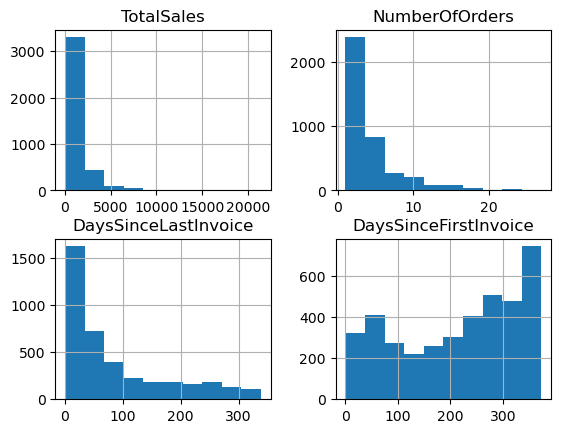

In [77]:
X = customerDF[['TotalSales', 'NumberOfOrders', 'DaysSinceLastInvoice', 'DaysSinceFirstInvoice']].copy()

X.hist()

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_std = scaler.fit_transform(X)

/Users/kuba/opt/anaconda3/envs/nova-3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kuba/opt/anaconda3/envs/nova-3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kuba/opt/anaconda3/envs/nova-3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kuba/opt/anaconda3/envs/nova-3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.

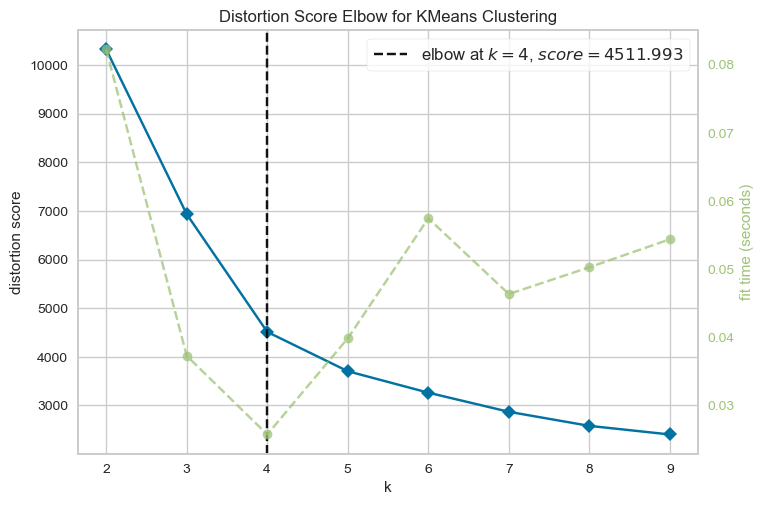

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()

visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(X_std)

visualizer.show()

In [80]:
# train on 5 clusters

model = KMeans(n_clusters=4, random_state=42)

model.fit(X_std)

preds = model.predict(X_std)

customerDF['Cluster'] = preds

customerDF.Cluster.value_counts().sort_index()

/Users/kuba/opt/anaconda3/envs/nova-3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
0    1389
1    1360
2     274
3     902
Name: count, dtype: int64

Text(0, 0.5, 'PCA 2')

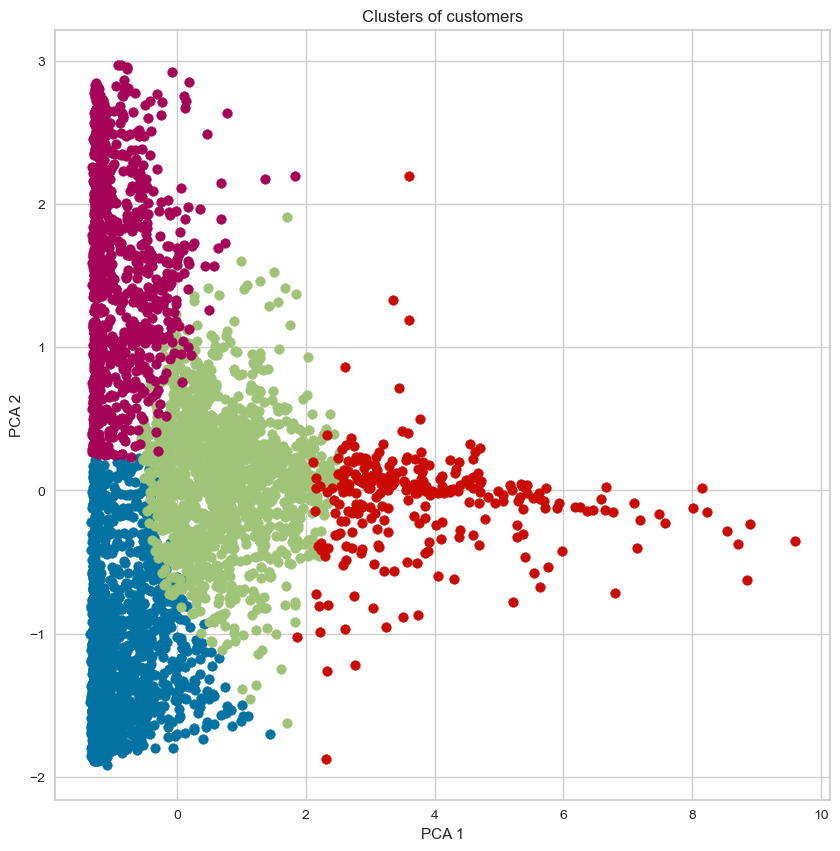

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_std)

plt.figure(figsize=(10, 10))

for i in range(5):
    plt.scatter(X_pca[preds == i, 0], X_pca[preds == i, 1], label=f'Cluster {i}')

plt.title('Clusters of customers')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [82]:
# distortion and silhouette score for 5 clusters

from sklearn.metrics import silhouette_score

print(f'Distortion: {model.inertia_}')
print(f'Silhouette score: {silhouette_score(X_std, preds)}')

Distortion: 4511.997676603913
Silhouette score: 0.4565935982962242


In [83]:
# calculate mean value ofeach variable per cluster in X_train

customerDF[['TotalSales', 'NumberOfOrders', 'DaysSinceLastInvoice', 'DaysSinceFirstInvoice', 'Cluster']].groupby('Cluster').median().sort_values(by='TotalSales').T

Cluster,3,0,1,2
TotalSales,314.335,386.42,1304.37,5074.01
NumberOfOrders,1.000,2.00,5.00,14.00
DaysSinceLastInvoice,232.000,38.00,30.00,10.00
DaysSinceFirstInvoice,267.000,71.00,305.00,360.00


#### Q2.2 Build a second model to segment costumers and compare the performance. (10 points)

The second model will add more dimensions to the input data for clustering.

Feature Selection:
- Calculate correlation of features
- For every pair of features with correlation coefficient higher than 0.75, remove one.
- Check distribution of variables
- (if needed) apply box-cox transformation
- scale data with standard scaler
- reduce dimensionality with PCA
- train Kmeans on optimal number of PCA Components (number of components explaining at least 0.8 of variance)

#### Identifying correlated variables 

In [84]:
# calculate the correlation between all pairs of numerical variables customerDF and from pairs that are highly correlated, remove one of the variables

corr_matrix = customerDF.drop(['CustomerID', 'Country', 'Cluster'], axis=1).corr()

# List to hold names of variables to remove
variables_to_remove = []

correlation_threshold = 0.80

# Iterate over the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        # If the correlation coefficient is higher than the threshold and
        # the variable names are not already in the list, add them
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            # Get the name of the variables/columns
            col_name = corr_matrix.columns[j]
            
            # Add the variable name if it's not already in the list
            if col_name not in variables_to_remove:
                variables_to_remove.append(col_name)

# variables_to_remove now contains the names of variables to remove
print(variables_to_remove)

['TotalReturnedValue']


array([[<Axes: title={'center': 'NumberOfOrders'}>,
        <Axes: title={'center': 'NumberOfReturns'}>,
        <Axes: title={'center': 'TotalSales'}>,
        <Axes: title={'center': 'AverageOrderValue'}>],
       [<Axes: title={'center': 'AverageReturnedValue'}>,
        <Axes: title={'center': 'UniqueItemsPerOrder'}>,
        <Axes: title={'center': 'AverageProductQuantity'}>,
        <Axes: title={'center': 'AvgItemPrice'}>],
       [<Axes: title={'center': 'InvoiceDayOfWeek'}>,
        <Axes: title={'center': 'InvoiceHour'}>,
        <Axes: title={'center': 'DaysSinceFirstInvoice'}>,
        <Axes: title={'center': 'DaysSinceLastInvoice'}>],
       [<Axes: title={'center': 'ClusterHierarchical'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

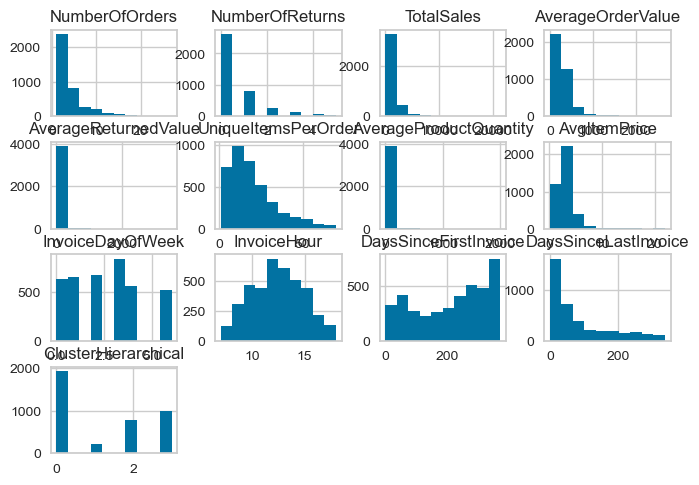

In [ ]:
X = customerDF.drop(['CustomerID', 'Country', 'Cluster', 'IsUK'], axis=1).drop(variables_to_remove, axis=1)

X.hist()

In [ ]:
# apply boxcox and select the features from X_train

from scipy.stats import boxcox

X_boxcox = X.copy()

for col in X_boxcox.columns:
    X_boxcox[col], _ = boxcox(X_boxcox[col] + 1)

# scale the data with new scaler
    
scaler = StandardScaler()

X_std = scaler.fit_transform(X_boxcox)

array([[<Axes: title={'center': 'NumberOfOrders'}>,
        <Axes: title={'center': 'NumberOfReturns'}>,
        <Axes: title={'center': 'TotalSales'}>,
        <Axes: title={'center': 'AverageOrderValue'}>],
       [<Axes: title={'center': 'AverageReturnedValue'}>,
        <Axes: title={'center': 'UniqueItemsPerOrder'}>,
        <Axes: title={'center': 'AverageProductQuantity'}>,
        <Axes: title={'center': 'AvgItemPrice'}>],
       [<Axes: title={'center': 'InvoiceDayOfWeek'}>,
        <Axes: title={'center': 'InvoiceHour'}>,
        <Axes: title={'center': 'DaysSinceFirstInvoice'}>,
        <Axes: title={'center': 'DaysSinceLastInvoice'}>],
       [<Axes: title={'center': 'ClusterHierarchical'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

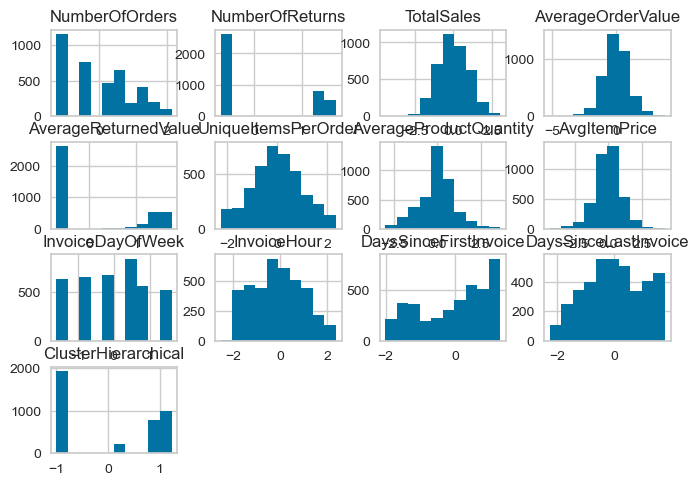

In [ ]:
pd.DataFrame(X_std, columns=X.columns).hist()

/Users/kuba/opt/anaconda3/envs/nova-3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


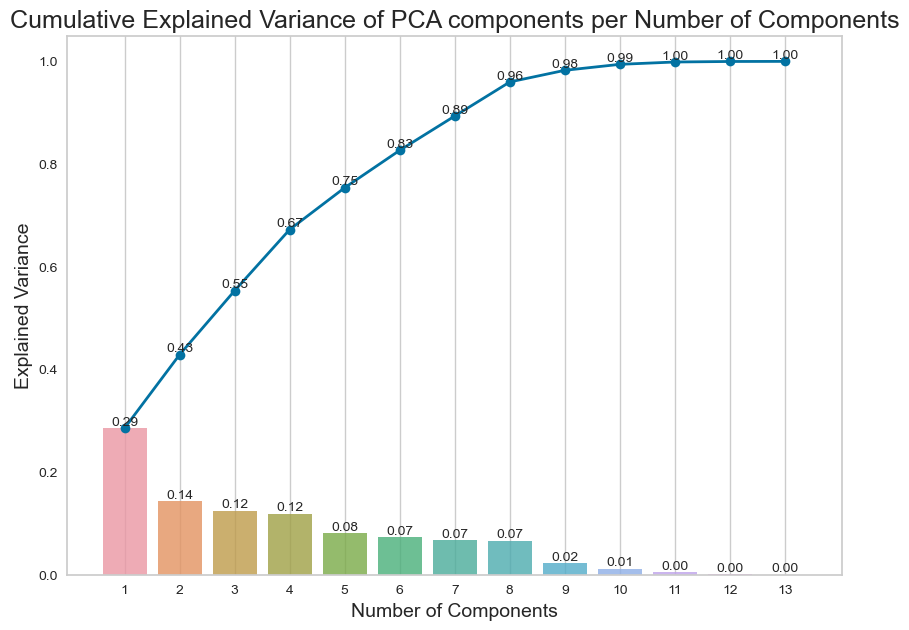

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_std)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 7))

barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      alpha=0.8)

lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linewidth=2)

plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Explained Variance of PCA components per Number of Components', fontsize=18)

# Display the variance values for both graphs on the plots

for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i , cum_ev_ratio, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [ ]:
n_features = 7

pca = PCA(n_components=n_features)

X_pca = pca.fit_transform(X_std)

/Users/kuba/opt/anaconda3/envs/nova-3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kuba/opt/anaconda3/envs/nova-3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kuba/opt/anaconda3/envs/nova-3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kuba/opt/anaconda3/envs/nova-3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.

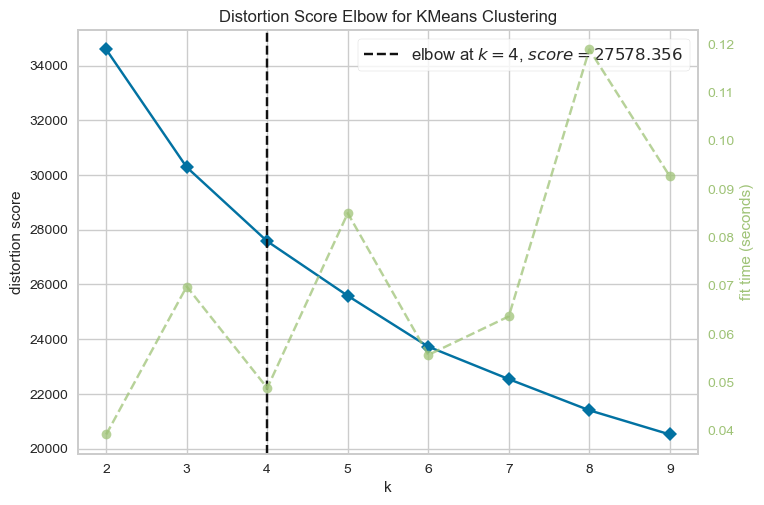

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# fit K_Means

model_2 = KMeans()

visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(X_pca)

visualizer.show()

In [ ]:
# n_clusters = 4

model_2 = KMeans(n_clusters=4, random_state=42)

model_2.fit(X_pca)

preds = model_2.predict(X_pca)

customerDF['ClusterKmeans_2'] = preds

customerDF.ClusterKmeans_2.value_counts().sort_index()

/Users/kuba/opt/anaconda3/envs/nova-3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ClusterKmeans_2
0     660
1    1200
2    1290
3     775
Name: count, dtype: int64

In [ ]:
# silhouette and inertia of train model

silhouette = silhouette_score(X_pca, preds)

distortion = model_2.inertia_

print(f'Silhouette Score of model 2: {silhouette}\n Distortion metric of model 2: {distortion}')

Silhouette Score of model 2: 0.18792463760452122
 Distortion metric of model 2: 27578.356207288103


#### Hierarchical Clustering

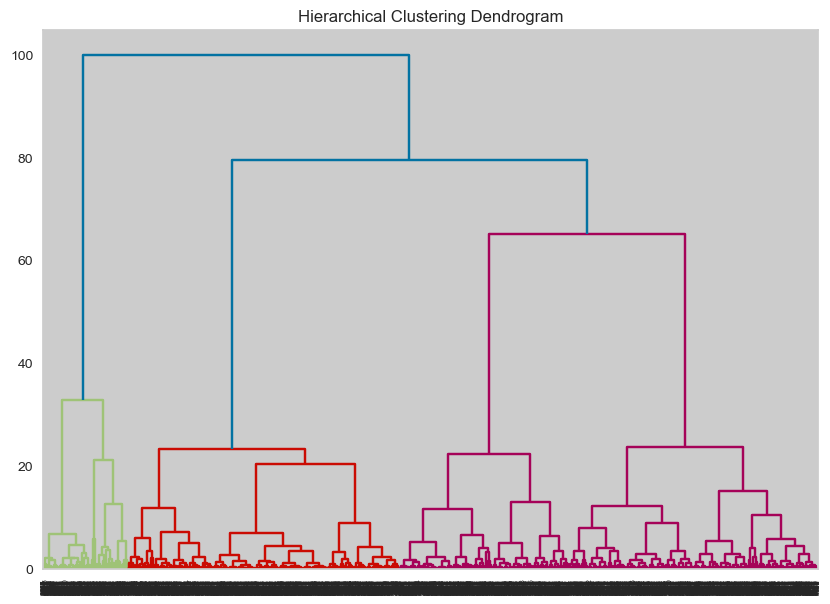

In [ ]:
# hierarchical clustering

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# linkage matrix
linkage_matrix = linkage(X_pca, method='ward')

# plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

max_d = 10

clusters = fcluster(linkage_matrix, max_d, criterion='distance')

n_clusters = len(np.unique(clusters))

print(f'Number of clusters: {n_clusters}')

Number of clusters: 71


In [ ]:
# get dataset with 4 features only

X = customerDF[['TotalSales', 'NumberOfOrders', 'DaysSinceLastInvoice', 'DaysSinceFirstInvoice']].copy()


# scale the data
    
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# fit hierarchical clustering

model_3 = AgglomerativeClustering(n_clusters=4)
preds = model_3.fit_predict(X_std)
customerDF['ClusterHierarchical'] = preds

customerDF.ClusterHierarchical.value_counts().sort_index()

ClusterHierarchical
0    1926
1     226
2     787
3     986
Name: count, dtype: int64

In [ ]:
# silhouette score of hierarchical clustering

silhouette = silhouette_score(X_std, preds)

print(f'Silhouette Score of model 3: {silhouette}')

Silhouette Score of model 3: 0.40431687223381846


Text(0, 0.5, 'Principal Component 2')

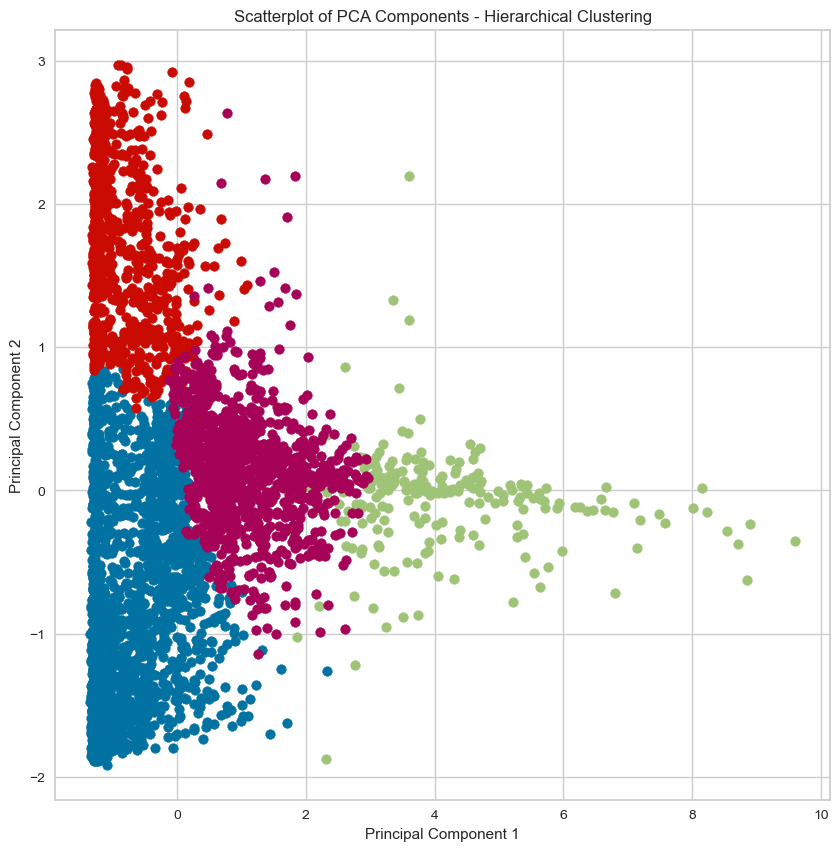

In [ ]:
# display the clusters on the PCA plot

plt.figure(figsize=(10, 10))

# fit new PCA to X_std

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_std)

for i in range(4):
    plt.scatter(X_pca[preds == i, 0], X_pca[preds == i, 1], label=f'Cluster {i}')

plt.title('Scatterplot of PCA Components - Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
    

In [ ]:
# describe the clusters

customerDF[['TotalSales', 'NumberOfOrders', 'DaysSinceLastInvoice', 'DaysSinceFirstInvoice', 'ClusterHierarchical']].groupby('ClusterHierarchical').median().sort_values(by='TotalSales').T

ClusterHierarchical,2,0,3,1
TotalSales,332.41,445.46,1676.885,5614.3
NumberOfOrders,2.00,2.00,6.000,15.0
DaysSinceLastInvoice,241.00,44.00,25.000,10.0
DaysSinceFirstInvoice,283.00,102.00,330.500,360.0


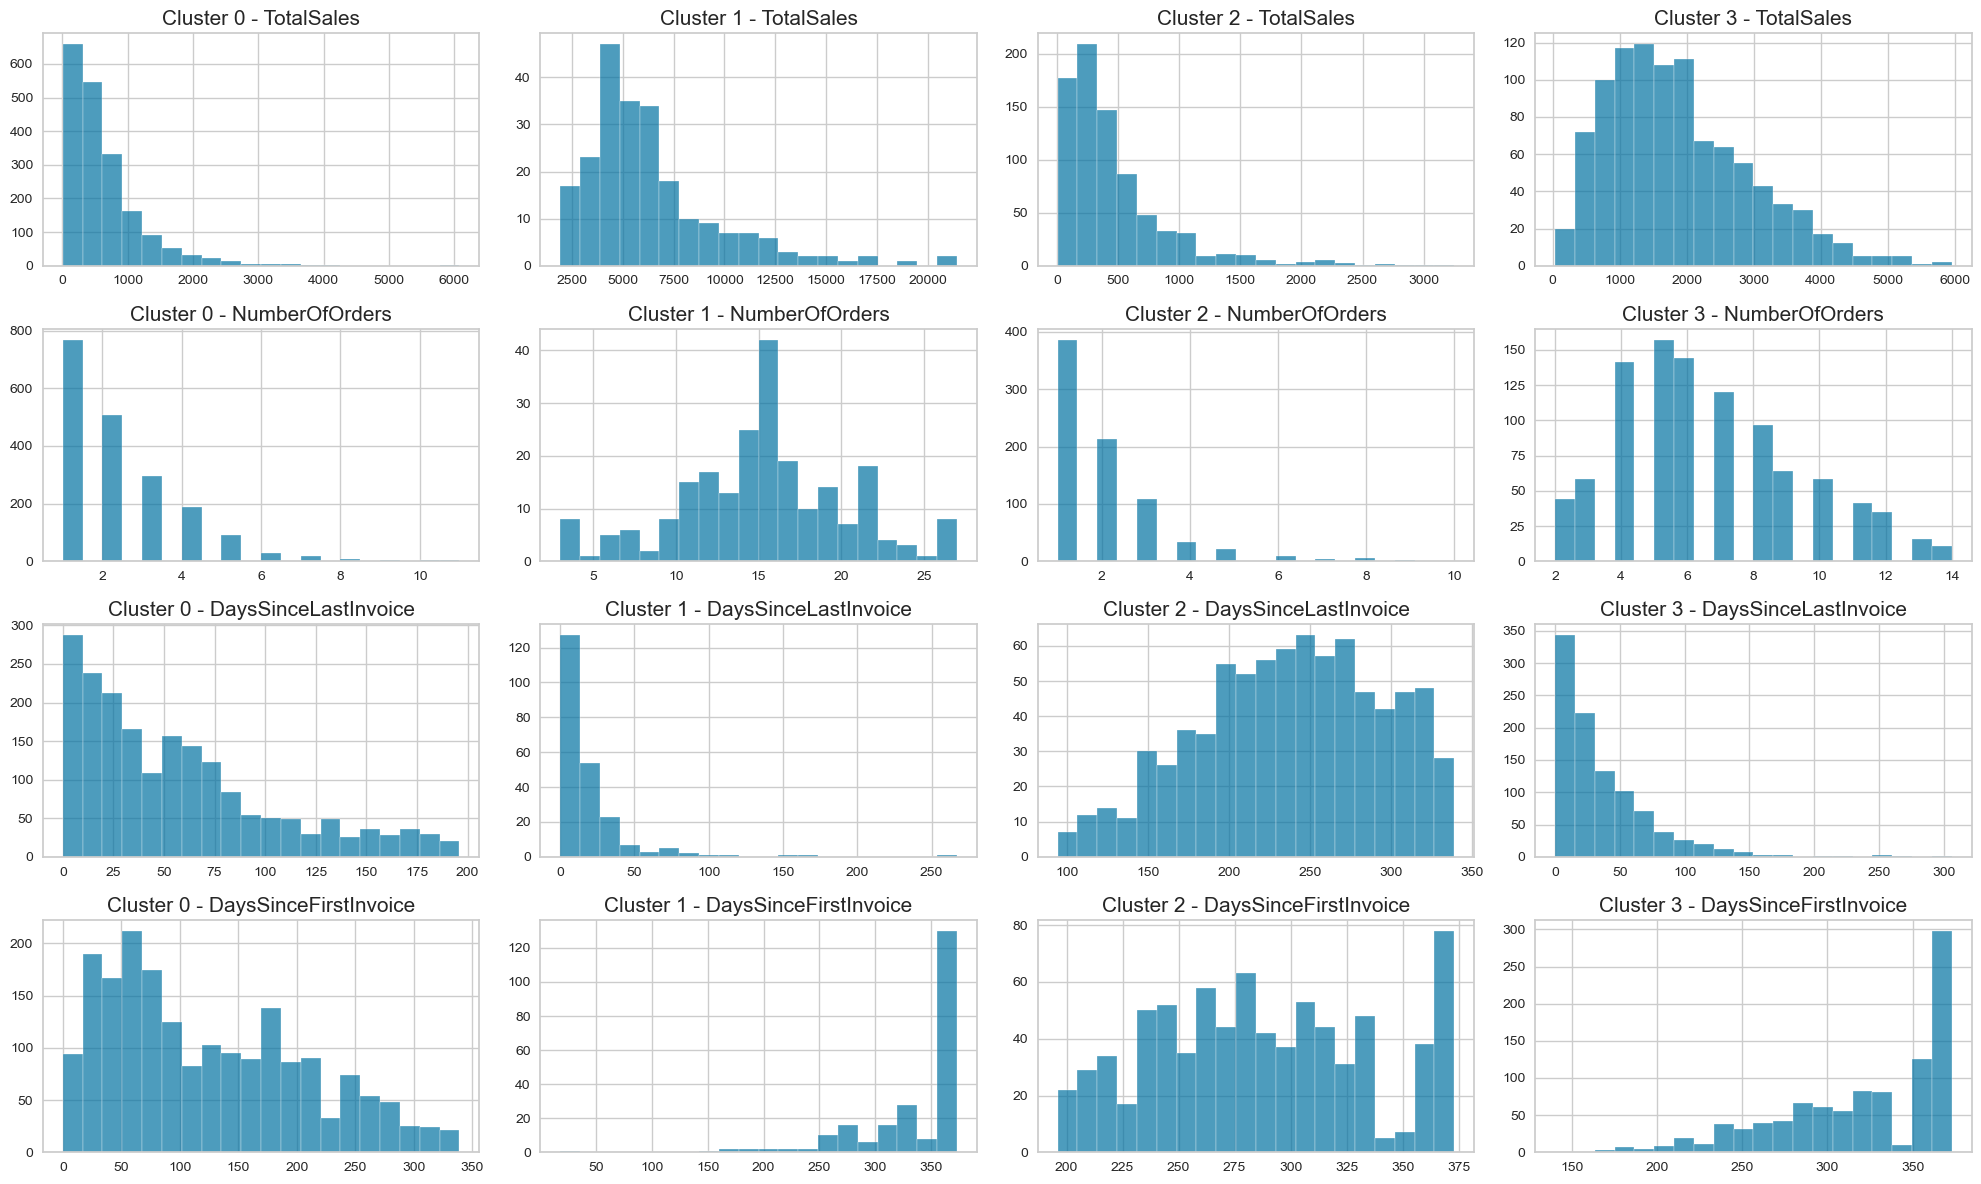

In [ ]:
# Plot histograms for each feature segmented by the clusters
features = customerDF[['TotalSales', 'NumberOfOrders', 'DaysSinceLastInvoice', 'DaysSinceFirstInvoice', 'ClusterHierarchical']].columns[:-1]
clusters = customerDF[['TotalSales', 'NumberOfOrders', 'DaysSinceLastInvoice', 'DaysSinceFirstInvoice', 'ClusterHierarchical']]['ClusterHierarchical'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customerDF[['TotalSales', 'NumberOfOrders', 'DaysSinceLastInvoice', 'DaysSinceFirstInvoice', 'ClusterHierarchical']][customerDF[['TotalSales', 'NumberOfOrders', 'DaysSinceLastInvoice', 'DaysSinceFirstInvoice', 'ClusterHierarchical']]['ClusterHierarchical'] == cluster][feature]
        axes[i, j].hist(data, bins=20, edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

#### Q2.3 Based on the analysis, suggest a number of clusters and their characteristics to the head of marketing. Please justify your decisions. (10 points)

**Clustering Recommendations**
Three models were tested with the following results:
1. K-Means on 4 features, with K=4: Silhouette Score ~.45 indicating fair clusters
2. K-Means on 6 PCA Components extracted from 12 Numerical Features with K=4: Silhouette Score ~0.19 inidcating weak clusters
3. Hierarchical Clustering on 4 features, n_clusters=4: Silhouette Score ~.40

Conclusion: The best clustering method appeared to be K-Means with 4 faeture and 4 clusters.


**-----Cluster Descriptions------**


**Cluster I**

Total Sales: Low (314.335)
Number of Orders: Very Low (1)
Days Since Last Invoice: High (232 days)
Days Since First Invoice: Moderately High (267 days)
Characteristics: These appear to be one-time buyers or very infrequent customers. They made their purchases a long time ago and haven’t returned since. These could be considered 'cold' leads.


**Cluster II**

Total Sales: Moderately Low (386.42)
Number of Orders: Low (2)
Days Since Last Invoice: Low (38 days)
Days Since First Invoice: Low (71 days)
Characteristics: These customers are relatively new with a few transactions. They have made purchases more recently than Cluster 0, suggesting they might be in the process of developing a buying pattern or could be encouraged to become more regular customers.


**Cluster III**

Total Sales: Moderate (1304.37)
Number of Orders: Moderate (5)
Days Since Last Invoice: Low (30 days)
Days Since First Invoice: High (305 days)
Characteristics: These customers have been around for a while and have made a moderate number of purchases with a decent total sales volume. Their recent activity suggests they are reasonably active and engaged.


**Cluster IV**

Total Sales: High (5074.01)
Number of Orders: High (14)
Days Since Last Invoice: Very Low (10 days)
Days Since First Invoice: Very High (360 days)
Characteristics: These are highly engaged, loyal customers who have been with the business for a long time. They have the highest frequency of orders and total sales, making them the most valuable segment.


**Recommendation to the Head of Marketing**

Based on this analysis, the recommendation would include focusing marketing efforts across these clusters with tailored strategies:



For Cluster 0 (Cold Leads): Develop re-engagement campaigns aimed at reigniting their interest. Offer special promotions or discounts to encourage them to make another purchase.

For Cluster 1 (New Customers): Implement welcome campaigns that encourage repeat purchases through incentives, showcasing best-selling products or services that match their initial interests. Their recent engagement suggests potential for development into regular customers.

For Cluster 2 (Engaged Customers): These customers are active and show loyalty. Personalized marketing, loyalty programs, and targeted upselling strategies could increase their lifetime value even further. Regular engagement to keep them informed and interested in new products or services is crucial.

For Cluster 3 (Loyal Customers): This group is crucial for sustained business success. Exclusive offers, early access to new products, and personal appreciation gestures can help maintain their high engagement level. Customized services and loyalty rewards can further cement their loyalty.

## Question 3: Create a recommendation system that helps the company to increase sales (35 points)


#### Q3.1 Build the recommendation system. (25 points)

In this exercise I will compare Product-based collaborative filtering and item-based collaborative filtering. They will be compared by Hit-Rate of customers -- the number of customers that purchased at least one of the recommended items divided by total number of customers.

Train/test split is applied in a way that 80% of (From dataset sorted by date) are in Train and latest 20% of customers in Test. This allows to keep the logic of past data infuencing future recommendations.

#### Client-based collaborative filtering

In [96]:
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from tqdm.auto import tqdm

/Users/kuba/opt/anaconda3/envs/nova-3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [153]:
# number of unique items
df.StockCode.nunique()

3675

Text(0, 0.5, 'Number of Customers')

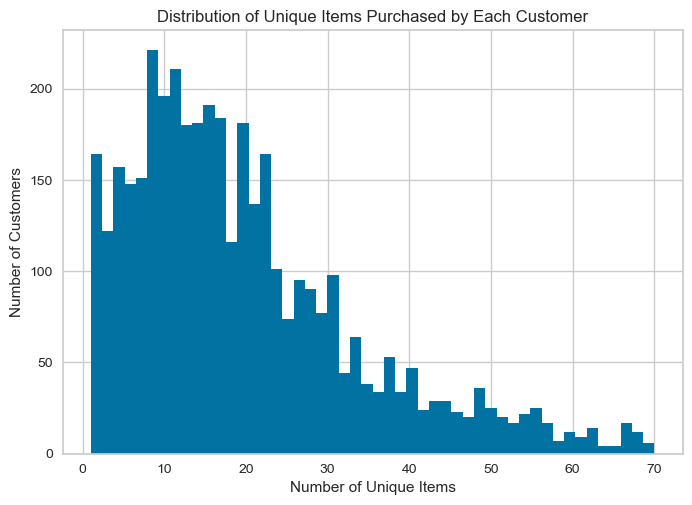

In [127]:
# display distribution of number of unique items purchased by each customer

customerDF['UniqueItemsPerOrder'].hist(bins=50)
plt.title('Distribution of Unique Items Purchased by Each Customer')
plt.xlabel('Number of Unique Items')
plt.ylabel('Number of Customers')

In [148]:
test_size = 0.2

# filter out the returns
purchasesDF = df[df.IsReturn == False].copy()

train_ids = int(purchasesDF.sort_values('InvoiceDate').CustomerID.unique().shape[0] * (1-test_size))

train_customers = purchasesDF.sort_values('InvoiceDate').CustomerID.unique()[:train_ids]

X_train = purchasesDF[purchasesDF.CustomerID.isin(train_customers)].copy()

X_test = purchasesDF[~purchasesDF.CustomerID.isin(train_customers)].copy()


In [149]:
X_test_customer_product = X_test[['CustomerID', 'StockCode', 'Quantity']].copy()

In [150]:
# User-item Matrix:

user_item_matrix = X_train.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)
productsDF = df[['Description', 'StockCode']].groupby(['Description']).StockCode.first().reset_index()

sparse_user_item = csr_matrix(user_item_matrix.values)
similarity_matrix = cosine_similarity(sparse_user_item)
similarity_matrix_df = pd.DataFrame(similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)


def find_similar_users_by_threshold(similarity_matrix_df, user_id, threshold):

    user_similarities = similarity_matrix_df.loc[user_id]
    similar_users = user_similarities[user_similarities > threshold]
    similar_users = similar_users.drop(user_id, errors='ignore') 
    
    return similar_users


def recommend_items_with_threshold(similarity_matrix_df, user_item_matrix, user_id, similarity_threshold=0.5, top_n=5):
    """
    Recommend items for a given user based on the similarity matrix and user-item matrix.

    Args:
    similarity_matrix_df (pd.DataFrame): DataFrame containing the similarity matrix
    user_item_matrix (pd.DataFrame): DataFrame containing the user-item matrix
    user_id (int): ID of the target user
    similarity_threshold (float): Threshold for the similarity score between users

    Returns:
    list: List of recommended items of length top_n
    
    """
    # Extract similarities for the target user and filter by the threshold
    user_similarities = similarity_matrix_df.loc[user_id]
    similar_users = user_similarities[user_similarities > similarity_threshold].index
    
    # If no users meet the threshold, return an empty list
    if len(similar_users) == 0:
        return []
    
    # Filter the user-item matrix to include only similar users
    similar_users_matrix = user_item_matrix.loc[similar_users]
    
    # Calculate the mean interaction for each item across similar users
    mean_item_interaction = similar_users_matrix.mean()
    
    # Get items the target user has already interacted with
    user_owned_items = user_item_matrix.loc[user_id, user_item_matrix.loc[user_id] > 0].index
    
    # Recommend items that the user hasn't interacted with, sorted by the mean interaction score
    recommended_items = mean_item_interaction[~mean_item_interaction.index.isin(user_owned_items)].sort_values(ascending=False).head(top_n).index.tolist()

    #recommendationDF = productsDF[productsDF.StockCode.isin(recommended_items)].reset_index(drop=True)
    
    return recommended_items

In [151]:
# test the function
recommend_items_with_threshold(similarity_matrix_df, user_item_matrix, 17850.0, similarity_threshold=0.5, top_n=5)

['10002', '35818P', '35599D', '35607A', '35607B']

In [152]:

def evaluate_customer_based_recommendation(similarity_matrix_df, user_item_matrix, X_test, num_recommendations):
    # Pre-calculate recommendations for all customers
    all_customers = user_item_matrix.index
    customer_recommendations = {
        customer: recommend_items_with_threshold(similarity_matrix_df, user_item_matrix, customer, similarity_threshold=0.5, top_n=num_recommendations)
        for customer in all_customers if customer in similarity_matrix_df.index
    }

    # Convert the dictionary into a list of tuples for easier DataFrame creation
    recommendations_list = [(customer, stock_code) for customer, stock_codes in customer_recommendations.items() for stock_code in stock_codes]

    # Create a DataFrame from the pre-calculated recommendations with 'CustomerID' and 'StockCode'
    recommendations_df = pd.DataFrame(recommendations_list, columns=['CustomerID', 'StockCode'])
    # Merge the test set with the recommendations to find potential hits
    merged_df = X_test.merge(recommendations_df, on=['CustomerID', 'StockCode'], how='inner')
    # Calculate Hit Rate
    hits = merged_df['CustomerID'].nunique()  # Count unique customers with at least one hit
    total_customers = X_test['CustomerID'].nunique()  # Total unique customers in the test set
    
    hit_rate = hits / total_customers if total_customers > 0 else 0

    print(f"Hit Rate for num_recommendations {num_recommendations}: {hit_rate}")

# Example usage, iterating over different numbers of recommendations
for i in range(1, 11):
    evaluate_customer_based_recommendation(similarity_matrix_df, user_item_matrix, X_test, i)


Hit Rate for num_recommendations 1: 0.0
Hit Rate for num_recommendations 2: 0.0
Hit Rate for num_recommendations 3: 0.0
Hit Rate for num_recommendations 4: 0.0
Hit Rate for num_recommendations 5: 0.0
Hit Rate for num_recommendations 6: 0.0
Hit Rate for num_recommendations 7: 0.0
Hit Rate for num_recommendations 8: 0.0
Hit Rate for num_recommendations 9: 0.0
Hit Rate for num_recommendations 10: 0.0


#### Item-based collaborative filtering

In [121]:
product_customer_matrix = X_train.pivot_table(index='StockCode', columns='CustomerID', values='Quantity', aggfunc='sum', fill_value=0)
sparse_product_customer = csr_matrix(product_customer_matrix.values)
product_similarity = cosine_similarity(sparse_product_customer)
product_similarity_df = pd.DataFrame(product_similarity, index=product_customer_matrix.index, columns=product_customer_matrix.index)


def get_product_recommendations(stock_code, num_recommendations=5):
    """
    Get product recommendations for a given stock code.
    
    Parameters:
    - stock_code: The stock code of the product to find recommendations for.
    - num_recommendations: Number of recommendations to return.
    
    Returns:
    - A list of recommended product stock codes.
    """
    # Get similarity values for the given stock code
    similarities = product_similarity_df[stock_code]
    
    # Remove the product itself from consideration
    similarities = similarities.drop(stock_code)
    
    # Get the top N similar products
    recommended_products = similarities.nlargest(n=num_recommendations).index.tolist()
    
    return recommended_products

In [168]:
from tqdm.auto import tqdm


# Assuming X_test_customer_product and product_similarity_df are defined as before
# Pre-calculate recommendations for all items
def evaluate_product_based_recommendation(num_recommendations):
    item_recommendations = {item: get_product_recommendations(item, num_recommendations) for item in product_similarity_df.index}

    # Create a DataFrame from the pre-calculated recommendations
    recommendations_df = pd.DataFrame(list(item_recommendations.items()), columns=['StockCode', 'RecommendedItems'])

    # Explode the RecommendedItems list to rows
    recommendations_df = recommendations_df.explode('RecommendedItems').reset_index(drop=True)

    # Merge the test set with the recommendations to find potential hits
    merged_df = X_test_customer_product.merge(recommendations_df, on='StockCode', how='left')

    # Check if any of the recommended items match the items bought by the same customer in the test set
    potential_hits = merged_df.merge(X_test_customer_product, left_on=['CustomerID', 'RecommendedItems'], right_on=['CustomerID', 'StockCode'], how='inner')

    # Calculate Hit Rate
    hits = potential_hits['CustomerID'].nunique()  # Count unique hits

    total_recommendations = X_test_customer_product['CustomerID'].nunique()  # Total unique recommendations

    hit_rate = hits / total_recommendations if total_recommendations > 0 else 0

    print(f"Hit Rate for num_recommendations {num_recommendations}: {hit_rate}")  

for i in range(1, 11):
    evaluate_product_based_recommendation(i)

Hit Rate for num_recommendations 1: 0.8027681660899654
Hit Rate for num_recommendations 2: 0.8500576701268743
Hit Rate for num_recommendations 3: 0.8650519031141869
Hit Rate for num_recommendations 4: 0.881199538638985
Hit Rate for num_recommendations 5: 0.8904267589388697
Hit Rate for num_recommendations 6: 0.8961937716262975
Hit Rate for num_recommendations 7: 0.9042675893886967
Hit Rate for num_recommendations 8: 0.9077277970011534
Hit Rate for num_recommendations 9: 0.9100346020761245
Hit Rate for num_recommendations 10: 0.9111880046136102


In [166]:
# let's investigate the results for sanity

test_customer_id = 15341.0

test_item = '23247'

# all unique items purchased by the customer
unique_items = X_test_customer_product[X_test_customer_product.CustomerID == test_customer_id].StockCode.unique()

# recommendations for test_item
recommendations = get_product_recommendations(test_item, 10)

# check if any product from recomemndations in in unique items
hits = [item for item in recommendations if item in unique_items]

hits

['22751']

In [172]:
# check most recommended items in general to see if some products are recommended vastly more often than others

item_recommendations = {item: get_product_recommendations(item, 5) for item in product_similarity_df.index}
recommendations_df = pd.DataFrame(list(item_recommendations.items()), columns=['StockCode', 'RecommendedItems'])

# Explode the RecommendedItems list to rows
recommendations_df = recommendations_df.explode('RecommendedItems').reset_index(drop=True)

# merge with product descriptions
recommendations_df = recommendations_df.merge(productsDF, left_on='RecommendedItems', right_on='StockCode', how='left')

recommendations_df.Description.value_counts().head(20)

Description
LARGE BLACK DIAMANTE HAIRSLIDE         172
MONTANA DIAMOND CLUSTER EARRINGS       151
GOLD APERITIF GLASS                    147
CD WALL TIDY BLUE OFFICE               131
ROSE PENDANT TRIPLE SHELL NECKLACE     129
BLUE BUNNY EASTER EGG BASKET           122
PINK BUNNY EASTER EGG BASKET           109
BIRD ON BRANCH CANVAS SCREEN           107
ORANGE PENDANT TRIPLE SHELL NECKLAC    103
ASSTD COL BUTTERFLY/CRYSTAL W/CHIME     84
HEN HOUSE W FAMILY IN BARN & NEST       83
TURQUOISE BERTIE GLASS BEAD CHARM       79
PINK FLOCK PHOTO FRAME                  77
PAINT YOUR OWN EGGS IN CRATE            75
5 HOOK HANGER RED MAGIC TOADSTOOL       71
PINK RIVIERA HANDBAG                    69
COFFEE MUG PINK PAISLEY DESIGN          66
SILICON CUBE 25W, BLUE                  66
PAPER LANTERN 9 POINT DELUXE STAR       63
6PC WOOD PLATE SET DISPOSABLE           62
Name: count, dtype: int64

#### Q3.2 Based on the analysis, suggest how the model can be used in marketing. Which data would you like to have to improve the results? Please justify your decisions. (10 points)

The hit rate results for the user-based recommendation system are uniformly zero, indicating that the system did not successfully predict any items that users ended up purchasing. In contrast, the item-based recommendation system displays a hit rate that significantly increases with the number of recommendations provided. It starts from a hit rate of 80.41% with a single recommendation and goes up to 91.29% with ten recommendations.

#### Interpretation of Results

**User-Based Recommendation System:**

A hit rate of 0 across all numbers of recommendations suggests a potential issue with the model or data. It might indicate that the user-user similarity matrix did not capture the actual similarities between users effectively, or the recommendation threshold may be too restrictive.
Another possible reason could be data sparsity – if users have not rated enough items in common, the similarities and subsequent recommendations may not be meaningful.

**Item-Based Recommendation System:**

The item-based recommendation system is performing well, as evidenced by the increasing hit rate with the number of recommendations. This suggests that items that are bought together by several users serve as a good basis for making recommendations to other users.
The success of the item-based model over the user-based one could be because purchasing patterns are more product-centric than user-centric, or the dataset contains more information about item associations than user relationships.
Graph Interpretation:


**Marketing Application:**

The item-based model could be effectively used in marketing for cross-selling and upselling by recommending additional products that complement items already in the customer's shopping cart or previous purchases.
Personalized product recommendations on e-commerce platforms or personalized marketing emails could leverage this model to increase basket size and customer lifetime value.

**Data Improvement Suggestions:**

To improve the results of the recommendation systems, especially the user-based system, the following data might be helpful:

- More Detailed User Preferences: Data on user ratings, reviews, or preferences could help better understand user tastes and improve the quality of user-user similarity calculations.
- Richer User Demographics: Information such as age, gender, location, and income level could be used to refine user profiles and improve recommendations.
- Temporal Dynamics: Tracking changes in user preferences over time, considering seasonality and trends could lead to more timely and relevant recommendations.
- Purchase Context: The context of purchases, such as whether the item was bought for personal use or as a gift, could differentiate between what the user likes and what they purchase for other reasons.
- Item Metadata: Additional information about the items, such as category, brand, or price range, could provide more dimensions for similarity calculations and potentially improve the performance of both models.